In [249]:
import numpy as np
import random 
from datetime import datetime
from numpy import genfromtxt
import pandas as pd

from sklearn.metrics import accuracy_score

from skimage import color

## Step 1 - Design and build a data for CNN && RNN model

In [250]:
new_pr=pd.read_csv('SNP500.csv')
old_pr=pd.read_csv('SNP500_old.csv')
pe=pd.read_csv('ie_data_PE_full.csv')

In [251]:

pe

,Date,PE_CAPE
0,1960.01,18.338285
1,1960.02,17.545275
2,1960.03,17.286021
3,1960.04,17.429767
4,1960.05,17.256171
...,...,...
727,2020.08,31.152309
728,2020.09,30.833593
729,2020.10,31.277783
730,2020.11,32.471647


In [252]:
old_pr = old_pr.drop(['Volume', 'Adj Close' ], 1)
old_pr['Date'] = pd.to_datetime(old_pr['Date'])
old_pr = old_pr.loc[ (old_pr['Date'] < '1978-01-03') &  (old_pr['Date']  >= '1960-01-01' )]
old_pr

/var/folders/d3/1_h4f4bs0_bdzwc4j6xvpvx80000gn/T/ipykernel_31535/1498906307.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  old_pr = old_pr.drop(['Volume', 'Adj Close' ], 1)


,Date,Open,High,Low,Close
2511,1960-01-04,59.910000,59.910000,59.910000,59.910000
2512,1960-01-05,60.389999,60.389999,60.389999,60.389999
2513,1960-01-06,60.130001,60.130001,60.130001,60.130001
2514,1960-01-07,59.689999,59.689999,59.689999,59.689999
2515,1960-01-08,59.500000,59.500000,59.500000,59.500000
...,...,...,...,...,...
7016,1977-12-23,93.800003,94.989998,93.750000,94.690002
7017,1977-12-27,94.690002,95.209999,94.089996,94.690002
7018,1977-12-28,94.690002,95.199997,93.989998,94.750000
7019,1977-12-29,94.750000,95.430000,94.099998,94.940002


In [253]:
new_pr['Date'] = pd.to_datetime(new_pr['Date'])
new_pr = new_pr.iloc[::-1].reset_index(drop = True)
new_pr.columns = ['Date', 'Open', 'High', 'Low', 'Close']
new_pr

,Date,Open,High,Low,Close
0,1978-01-03,93.82,95.15,93.49,93.82
1,1978-01-04,93.52,94.10,93.16,93.52
2,1978-01-05,92.74,94.53,92.51,92.74
3,1978-01-06,91.62,92.66,91.05,91.62
4,1978-01-09,90.64,91.52,90.01,90.64
...,...,...,...,...,...
10839,2020-12-24,3694.03,3703.82,3689.32,3703.06
10840,2020-12-28,3723.03,3740.51,3723.03,3735.36
10841,2020-12-29,3750.01,3756.12,3723.31,3727.04
10842,2020-12-30,3736.19,3744.63,3730.21,3732.04


In [254]:
frm = [old_pr, new_pr]
cost = pd.concat(frm).reset_index(drop = True)
price.to_csv('sp500data.csv',index = False)

In [259]:
cost

,Date,Open,High,Low,Close,Date_PE
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,1960.01
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,1960.01
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,1960.01
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,1960.01
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,1960.01
...,...,...,...,...,...,...
15349,2020-12-24,3694.030000,3703.820000,3689.320000,3703.060000,2020.12
15350,2020-12-28,3723.030000,3740.510000,3723.030000,3735.360000,2020.12
15351,2020-12-29,3750.010000,3756.120000,3723.310000,3727.040000,2020.12
15352,2020-12-30,3736.190000,3744.630000,3730.210000,3732.040000,2020.12


In [264]:
cost['Date_PE']=0.0
for i in range(cost.shape[0]):
    year = cost['Date'][i].year
    month = cost['Date'][i].month
    cost.loc[i, 'Date_PE']=year+month*0.01
df = pd.merge(price, pe, how='left', on='Date')
df = df.drop(['Date_PE' ], 1)

In [260]:
cost

,Date,Open,High,Low,Close,Date_PE
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,1960.01
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,1960.01
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,1960.01
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,1960.01
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,1960.01
...,...,...,...,...,...,...
15349,2020-12-24,3694.030000,3703.820000,3689.320000,3703.060000,2020.12
15350,2020-12-28,3723.030000,3740.510000,3723.030000,3735.360000,2020.12
15351,2020-12-29,3750.010000,3756.120000,3723.310000,3727.040000,2020.12
15352,2020-12-30,3736.190000,3744.630000,3730.210000,3732.040000,2020.12


In [ ]:
df.to_csv('Price_PE.csv')

In [ ]:
df

In [13]:
df['PE_CAPE'].values

array([18.33828499, 18.33828499, 18.33828499, ..., 33.76978942,
       33.76978942, 33.76978942])

In [261]:
mon = df['PE_CAPE'].values
day = mon.copy()
price_tmp = df['Close'][0]
for i in range(1, len(mon)):
    if mon[i] == mon[i-1]:
        buff = mon[i]/price_tmp*df['Close'][i]
        day[i] = buff
        
    else:
        #new month
        price_tmp = df['Close'][i]
        day[i] = mon[i]
df['PE_CAPE'] = day        

In [262]:
df

,Date,Open,High,Low,Close,PE_CAPE
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.338285
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.485211
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.405627
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.270943
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.212785
...,...,...,...,...,...,...
15349,2020-12-24,3694.030000,3703.820000,3689.320000,3703.060000,34.144236
15350,2020-12-28,3723.030000,3740.510000,3723.030000,3735.360000,34.442059
15351,2020-12-29,3750.010000,3756.120000,3723.310000,3727.040000,34.365344
15352,2020-12-30,3736.190000,3744.630000,3730.210000,3732.040000,34.411447


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


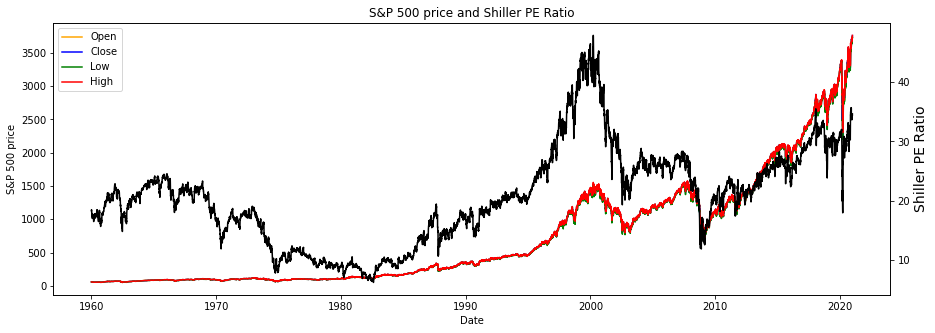

In [263]:
plt.figure(figsize=(15, 5));
plt.plot(df.Date, df.Open.values, color='orange', label='Open')
plt.plot(df.Date, df.Close.values, color='blue', label='Close')
plt.plot(df.Date, df.Low.values, color='green', label='Low')
plt.plot(df.Date, df.High.values, color='red', label='High')
plt.title('S&P 500 price and Shiller PE Ratio')
plt.xlabel('Date')
plt.ylabel('S&P 500 price')
plt.legend(loc='best')
ax2=plt.twinx()
ax2.plot(df.Date, df.PE_CAPE.values,color="black",label='Shiller PE Ratio')
ax2.set_ylabel("Shiller PE Ratio", color="black",fontsize=14)
plt.savefig('price_pe.eps')
plt.show()


### Here, we are only using ClOSE price and Cyclicily adjusted PE-ratio to train the model

In [17]:
data = df[ ['Close', 'PE_CAPE']].values
data

array([[  59.91      ,   18.33828499],
       [  60.389999  ,   18.48521135],
       [  60.130001  ,   18.40562669],
       ...,
       [3727.04      ,   34.3653445 ],
       [3732.04      ,   34.41144723],
       [3756.07      ,   34.63301695]])

In [18]:
dtInfo= df[ ['Date']].values

In [19]:
src = MinMaxScaler(feature_range = (0, 1))
scalDt = src.fit_transform(data)
scalDt

array([[0.00208161, 0.29057405],
       [0.0022112 , 0.29410392],
       [0.002141  , 0.29219192],
       ...,
       [0.99216225, 0.67562076],
       [0.99351219, 0.67672837],
       [1.        , 0.68205154]])

## Step 2 - Develop and test/verify a correlation-based algorithm to correlate when the Schiller P/E ratio is very high (spikes upward significantly) and the S&P500 is also high (peaking or ready to peak)

In [20]:
data = np.append(data, np.zeros([len(info),1]),1)
data

In [22]:
sam = 180
for i in range(sam-1 ,len(data)):
    # Pearson's r
    x = data[(i-sam+1):(i+1), 0]
    y = data[(i-sam+1):(i+1), 1]
    r = np.corrcoef(x, y)
    data[i][2] = r[0,1] 
data

array([[5.99100000e+01, 1.83382850e+01, 0.00000000e+00],
       [6.03899990e+01, 1.84852114e+01, 0.00000000e+00],
       [6.01300010e+01, 1.84056267e+01, 0.00000000e+00],
       ...,
       [3.72704000e+03, 3.43653445e+01, 8.56769470e-01],
       [3.73204000e+03, 3.44114472e+01, 8.60287868e-01],
       [3.75607000e+03, 3.46330170e+01, 8.64293744e-01]])

Text(0, 0.5, 'Pearson Correlation')

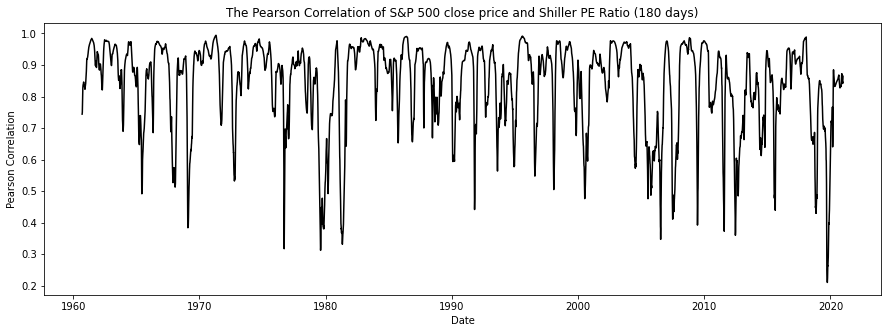

In [23]:
plt.figure(figsize=(15, 5));
plt.plot(df.Date.loc[~df.Date.index.isin(list(range(sam-1))) ],
         data[(sam-1):, 2], color='black', label='Close')
plt.title('The Pearson Correlation of S&P 500 close price and Shiller PE Ratio (180 days)')
plt.xlabel('Date')
plt.ylabel('Pearson Correlation')


### We buy and sell the s&p 500 ind if the correlation in that window interval is greater than 0.95. We buy at the local minia in that window interval and sell it at the end point in that interval

In [24]:
trd_full = []
amt_full = []
money = 1
zero = 0
for i in range(sam-1, data.shape[0]):
    buffCorr = data[i,2]
    tmp_pr = data[(i-sam+1):(i+1), 0]
    if buffCorr > 0.95 and (i-zero > sam):
        buy_pr = min(tmp_pr)
        if buy_pr > 0:           
            sell_pr = tmp_pr[len(tmp_pr)-1]
            money = sell_pr/buy_pr*money
            zero = i
            print(buy_pr)
            print(sell_pr)
            print(money)
            print(i) 
            trd_full.append(i)
            amt_full.append(money)
            
            

52.200001
64.699997
1.2394635203167907
307
55.5
57.57
1.285692159723201
609
53.490002
65.610001
1.577009922062283
806
69.610001
81.150002
1.8384478737383458
1093
83.629997
86.480003
1.901099884485656
1627
73.199997
90.089996
2.339755300658185
1813
77.849998
77.849998
2.339755300658185
2579
69.290001
94.889999
3.204205151327676
2760
90.160004
110.18
3.915697736363048
3066
102.730003
104.440002
3.980876739750044
3364
90.660004
94.330002
4.1420261885536105
3563
62.279999
67.650002
4.499166416809097
3744
87.56
87.64
4.503277121621165
4546
98.22
131.92
6.048384421546162
5219
112.77
123.29
6.612621400482632
5483
107.2
107.72
6.644697549067062
5664
102.42
158.75
10.299216324100723
5845
154.29
156.69
10.459421905653913
6082
180.66
216.24
12.519347906999903
6558
229.91
296.13
16.12524246748676
6843
263.82
331.84
20.282770299487556
7424
295.46
390.45
26.803654178010277
7868
370.65
408.26
29.523431417009245
8081
402.66
456.33
33.45856916138635
8348
445.45
513.55
38.573685470490425
8887
720.98
936

Text(0, 0.5, 'Money (millions)')

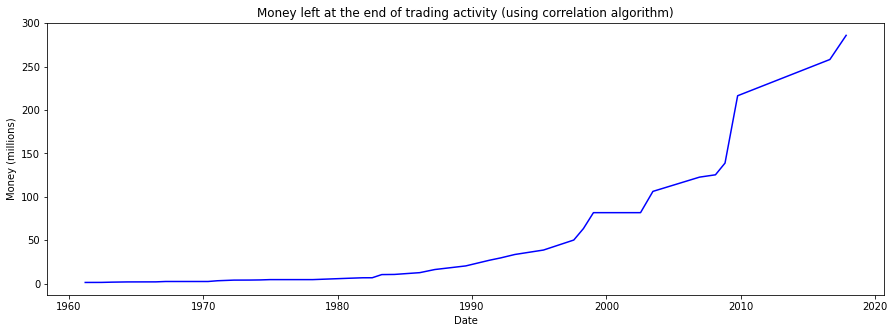

In [25]:
plt.figure(figsize=(15, 5));
plt.plot(df.Date.loc[trd_full],
         amt_full, color='blue', label='Close')
plt.title('Money left at the end of trading activity (using correlation algorithm)')
plt.xlabel('Date')
plt.ylabel('Money (millions)')

In [26]:
money

285.9084747632908

In [27]:
dt_scal = np.append(dt_scal, np.zeros([len(data),1]),1)
sam = 180
for i in range(sam-1 ,len(dt_scal)):
    x = dt_scal[(i-sam+1):(i+1), 0]
    y = dt_scal[(i-sam+1):(i+1), 1]
    r = np.corrcoef(x, y)
    dt_scal[i][2] = r[0,1] 
dt_scal

array([[0.00208161, 0.29057405, 0.        ],
       [0.0022112 , 0.29410392, 0.        ],
       [0.002141  , 0.29219192, 0.        ],
       ...,
       [0.99216225, 0.67562076, 0.85676947],
       [0.99351219, 0.67672837, 0.86028787],
       [1.        , 0.68205154, 0.86429374]])

In [28]:
data.shape

(15354, 3)

### To find some representative figures which include the A-B-C-D-wave patterns in the S&P500 data, we use the data where the correlation coefficient of S&P500 and Schiller P/E ratio is larger than 0.95.   We also add a shifting x-window, by shifting every plot sam//3 days to get more diverse plots. Besides, we add some constraint conditions that the end price is the highest point and the S&P500 price drop after that day.

In [30]:
indexSell = []
previous = 0
for x in range(sam-1, len(dt_scal)):
    if dt_scal[x][2] > 0.95 and x >= previous+sam//3 and \
    dt_scal[x][0] == max(dt_scal[(x-sam+1):(x+1), 0]) and \
    dt_scal[x][0] > dt_scal[x+1][0]:
        indexSell.append(x)
        previous = x

In [31]:
len(indexSell)

32

In [32]:
def plotData(data,ind,fid):
    prevPrice = []
    xaxis = np.arange(0, sam)
    for x in reversed(range(0, sam)):
        prevPrice.append(data[ind-x][0])        
    name = "day%i" %ind
    plt.axis('off')
    plt.plot(prevPrice, color ="black") 
    name = name + '.png'
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    plt.savefig(fid + name, bbox_inches='tight', pad_inches=0, dpi = 100)
    plt.clf()    

In [33]:
fid = 'CandidateTrainSell/'
if os.path.exists(fid ):
    shutil.rmtree(fid )
os.makedirs(fid )

for x in indexSell:
    plotData(dt_scal,x,fid)

<Figure size 576x576 with 0 Axes>

### To find some representative figures which does not include the A-B-C-D-wave patterns in the S&P500 data, we use the data where the correlation coefficient of S&P500 and Schiller P/E ratio is smaller than 0.5.   We also add a shifting x-window, by shifting every plot sam//3 days to get more diverse plots. Besides, we add some constraint conditions that the end price isn't the highest point.

In [34]:
indexHeld = []
previous = 0
for x in range(sam-1,len(dt_scal)):
    if dt_scal[x][2] < 0.5  and x >= previous+sam//3 and \
    dt_scal[x][0] < max(dt_scal[(x-sam+1):(x+1), 0]):
        indexHeld.append(x)
        previous = x
len(indexHeld)

22

In [35]:
fid = 'CandidateTrainHold/'
if os.path.exists(fid ):
    shutil.rmtree(fid )
os.makedirs(fid )

for x in indexHeld:
    plotData(dt_scal,x,fid)
train_img = []

<Figure size 576x576 with 0 Axes>

### Manually picking CandidateTrain sample, which almost fitting the required ABCD pattern from assignment for label=1 sample

In [36]:

for nmImg in tqdm(indexSell):
    path = 'CandidateTrainSell/day' + str(nmImg) + '.png'
    image = imread(path, as_gray=True)
    
    re_image = resize(image, (180, 180),
                       anti_aliasing=True)
    re_image = re_image.astype('float32')
      
    train_img.append(re_image)
train_y = np.repeat(1, len(indexSell))

for nmImg in tqdm(indexHeld):
    path = 'CandidateTrainHold/day' + str(nmImg) + '.png'
    image = imread(path, as_gray=True)
    
    re_image = resize(image, (180, 180),
                       anti_aliasing=True)
    re_image = re_image.astype('float32')
    image = image.astype('float32')
    train_img.append(re_image)
train_y = np.append(train_y, np.repeat(0, len(indexHeld))  )  
    
xTr = np.array(train_img)



100%|███████████████████████████████████████████| 22/22 [00:00<00:00, 39.52it/s]


(54, 180, 180)

In [273]:
xTr.shape

torch.Size([43, 1, 180, 180])

In [268]:
figure, lines = plt.subplots(1, 10 ,figsize=(20,20))
for i, j in enumerate(lines.flatten()):
    j.imshow(xTr[i], cmap='gray', vmin=0, vmax=1)
    j.axis('off')
# plt.show()

In [269]:
figure, lines = plt.subplots(1, 10 ,figsize=(20,20))
for i, j in enumerate(lines.flatten()):
    j.imshow(xTr[i], cmap='Greens_r', vmin=0, vmax=1)
    j.axis('off')
# plt.show()

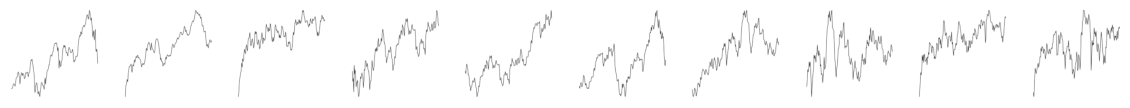

In [39]:
figure, lines = plt.subplots(1, 10 ,figsize=(20,20))
for i, j in enumerate(lines.flatten()):
    j.imshow(xTr[len(indexSell)+ i], cmap='Greens_r', vmin=0, vmax=1)
    j.axis('off')
plt.show()

## Step 3 - Design and develop a convolutional neural network (CNN) in Python that will recognize A-B-C-D-wave patterns in the S&P500 data,  using libraries such as PyTorch (and, if necessary, Tensor Flow).  

### Here, we develop CNN and train it with picked Sell and Hold datasets

In [40]:
train_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [276]:
import torch
from torch.autograd import Variable
from torch.optim importd Adam, SGD
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.utils.data as data
# for creating validation set
from sklearn.model_selection import train_test_split


SyntaxError: invalid syntax (4164352231.py, line 3)

SyntaxError: invalid syntax (2798371874.py, line 3)

In [41]:
# create validation set
xTr, val_x, train_y, val_y = train_test_split(xTr, train_y, test_size = 0.20, random_state=0)
(xTr.shape, train_y.shape), (val_x.shape, val_y.shape)

(((43, 180, 180), (43,)), ((11, 180, 180), (11,)))

In [42]:
val_y

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [43]:
len(val_y)

11

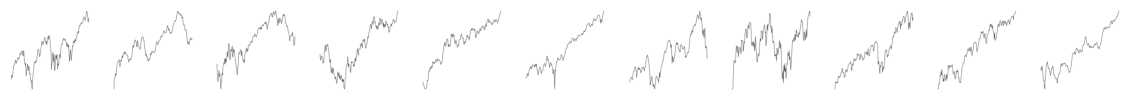

In [44]:
# display the images in the validation data
figure, lines = plt.subplots(1, len(val_y) ,figsize=(20,20))
for i, j in enumerate(lines.flatten()):
    j.imshow(val_x[i], cmap='gray', vmin=0, vmax=1)
    j.axis('off')
plt.show()

In [45]:
xTr.shape[0]

43

In [ ]:
xTr = xTr.reshape(xTr.shape[0], 1, xTr.shape[1], xTr.shape[2])
xTr  = torch.from_numpy(xTr)

In [46]:

train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)
xTr.shape, train_y.shape

(torch.Size([43, 1, 180, 180]), torch.Size([43]))

In [47]:
val_x = val_x.reshape(val_x.shape[0], 1, val_x.shape[1], val_x.shape[2])
val_x  = torch.from_numpy(val_x)

val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

val_x.shape, val_y.shape

(torch.Size([11, 1, 180, 180]), torch.Size([11]))

In [48]:
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(8100, 2)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)      
        x = self.linear_layers(x)
        return x

In [49]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
model = Net()
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=8100, out_features=2, bias=True)
  )
)


In [50]:
def train(epoch):
    model.train()
    trainLoss = 0
    x_train, y_train = Variable(xTr), Variable(train_y)
    x_val, y_val = Variable(val_x), Variable(val_y)
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    optimizer.zero_grad()
    
    output_train = model(x_train)
    output_val = model(x_val)

    lossTrain = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(lossTrain)
    val_losses.append(loss_val)

    lossTrain.backward()
    optimizer.step()
    trainLoss = lossTrain.item()
    if epoch%5 == 0:
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)
    with torch.no_grad():
        output = model(xTr)

    softmax = torch.exp(output)
    prob = list(softmax.numpy())
    predictions = np.argmax(prob, axis=1)

    trAccur.append(accuracy_score(train_y, predictions))
    
    with torch.no_grad():
        output = model(val_x)

    softmax = torch.exp(output)
    prob = list(softmax.numpy())
    predictions = np.argmax(prob, axis=1)

    val_accuracy.append(accuracy_score(val_y, predictions))
    
    countHold = sum(np.logical_and(predictions == 0, val_y.numpy() == 0))
    countSell = sum(np.logical_and(predictions == 1, val_y.numpy() == 1))
    
    heldAccur = countHold/sum(val_y == 0)
    accuracysell = countSell/sum(val_y == 1)
    if epoch%5 == 0:
        print('Epoch: ', epoch+1,  '| Hold/Sell accuracy: %.2f/%.2f' %(heldAccur, accuracysell))

In [51]:

torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
n_epochs = 40
train_losses = []
val_losses = []
trAccur = []
val_accuracy = []

print("Number of train samples: ", len(train_y))
print("Number of test samples: ", len(val_y))
for epoch in range(n_epochs):
    train(epoch)

Number of train samples:  43
Number of test samples:  11
Epoch :  1 	 loss : tensor(0.7969, grad_fn=<NllLossBackward0>)
Epoch:  1 | Hold/Sell accuracy: 0.50/1.00
Epoch :  6 	 loss : tensor(0.8312, grad_fn=<NllLossBackward0>)
Epoch:  6 | Hold/Sell accuracy: 0.50/1.00
Epoch :  11 	 loss : tensor(1.0819, grad_fn=<NllLossBackward0>)
Epoch:  11 | Hold/Sell accuracy: 0.50/1.00
Epoch :  16 	 loss : tensor(1.0197, grad_fn=<NllLossBackward0>)
Epoch:  16 | Hold/Sell accuracy: 0.67/1.00
Epoch :  21 	 loss : tensor(0.9836, grad_fn=<NllLossBackward0>)
Epoch:  21 | Hold/Sell accuracy: 0.67/1.00
Epoch :  26 	 loss : tensor(0.9645, grad_fn=<NllLossBackward0>)
Epoch:  26 | Hold/Sell accuracy: 0.67/1.00
Epoch :  31 	 loss : tensor(0.9553, grad_fn=<NllLossBackward0>)
Epoch:  31 | Hold/Sell accuracy: 0.67/1.00
Epoch :  36 	 loss : tensor(0.9526, grad_fn=<NllLossBackward0>)
Epoch:  36 | Hold/Sell accuracy: 0.67/1.00


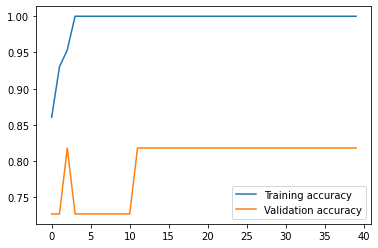

In [52]:
plt.plot(trAccur, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

In [56]:
with torch.no_grad():
    output = model(xTr)
  
softmax = torch.exp(output)
prob = list(softmax.numpy())


predictions = np.argmax(prob, axis=1)



accuracy_score(train_y, predictions)

1.0

In [57]:
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

accuracy_score(val_y, predictions)

0.8181818181818182

In [58]:
torch.argmax(output, dim = 1) 

tensor([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [59]:
val_y

tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

## Step 4 - Train your CNN and RNN on your Training Set (S&P500 data, from Step 1, above) then test to ensure it functions correctly when predicting the next one, two, three, and four trading data (average price or close price - either is o.k.) before you go on to Step 5.  Document your training results

In [60]:

input_size = 3


In [ ]:
output_size = 4
window_size = 180

In [61]:
n_rows, n_cols = dt_scal.shape
(n_rows, n_cols)

(15354, 3)

In [62]:
X_full = []
y_full = []
date_full = []
for i in range( n_rows - window_size - output_size +1):
    X_full.append(dt_scal[i:i+window_size, ])
    y_full.append(dt_scal[i+window_size: i+ window_size + output_size, 0])
    date_full.append(dt_data[i+window_size])
    
X_full, y_full, date_full = np.array(X_full), np.array(y_full), np.array(date_full)
y_full = np.reshape(y_full, (y_full.shape[0], 1, y_full.shape[1]))

In [63]:
hidden_size = 16
num_layers = 1
num_epochs = 100
learning_rate = 0.001

In [64]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

 
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        hidden = self.init_hidden(batch_size)

        out, hidden = self.rnn(x, hidden)
        
        out = self.fc(out)
        return out[:, -1, :], hidden
    
    def init_hidden(self, batch_size):
      
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

### First, run through CNN on all data, and adding CNN output into X_full as the third input

In [70]:
all_img = []
for i in range(X_full.shape[0]):  
    if i%500 == 0:
        print(i)
    x = X_full[i,:, 0]
    plt.axis('off')
    plt.plot(x, color ="blue") 
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    figure.canvas.draw()
       
    width, height = figure.get_size_inches() * figure.get_dpi()
    mplimage = np.frombuffer(figure.canvas.tostring_rgb(), dtype='uint8').reshape(576, 576, 3)
    gray_image = color.rgb2gray(mplimage)
    re_image = resize(gray_image, (180, 180),anti_aliasing=True)
    re_image = re_image.astype('float32')
    plt.clf()   
    all_img.append(re_image)
    
all_x = np.array(all_img)
all_x.shape

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000


(15171, 180, 180)

<Figure size 576x576 with 0 Axes>

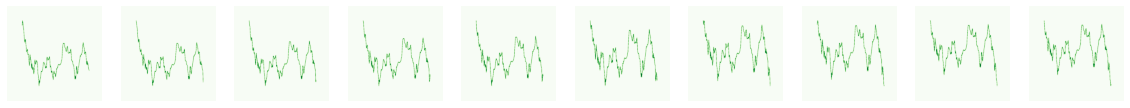

In [78]:
figure, lines = plt.subplots(1, 10 ,figsize=(20,20))
for i, j in enumerate(lines.flatten()):
    j.imshow(all_x[i], cmap='Greens_r', vmin=0, vmax=1)
    j.axis('off')
plt.show()

In [ ]:
data = df[ ['Close', 'PE_CAPE']].values

In [85]:

data = np.append(data, np.zeros([len(data),1]),1)
data.shape

(15354, 3)

In [86]:
all_x = all_x.reshape(all_x.shape[0], 1, all_x.shape[1], all_x.shape[2])
all_x = torch.from_numpy(all_x)
all_x.shape

torch.Size([15171, 1, 180, 180])

In [87]:
with torch.no_grad():
    output = model(all_x)

softmax = torch.exp(output)

prob = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 

In [88]:
for i in range( len(prob)):
    data[i+ window_size, 2] = prob[i]

In [89]:
sc = MinMaxScaler(feature_range = (0, 1))
dt_scal = sc.fit_transform(data)
dt_scal

array([[0.00208161, 0.29057405, 0.        ],
       [0.0022112 , 0.29410392, 0.        ],
       [0.002141  , 0.29219192, 0.        ],
       ...,
       [0.99216225, 0.67562076, 0.        ],
       [0.99351219, 0.67672837, 0.        ],
       [1.        , 0.68205154, 0.        ]])

In [ ]:
X_full = []
y_full = []
date_full = []

In [90]:

for i in range(window_size , n_rows - window_size - output_size +1):
    X_full.append(dt_scal[i:i+window_size, ])
    y_full.append(dt_scal[i+window_size: i+ window_size + output_size, 0])
    date_full.append(dt_data[i+window_size])
    
X_full, y_full, date_full = np.array(X_full), np.array(y_full), np.array(date_full)
y_full = np.reshape(y_full, (y_full.shape[0], 1, y_full.shape[1]))

In [ ]:
X_full.shape

### The NYSE and NASDAQ average about 253 trading days a year. We use 20\% for testing, i.e. first 200 days for training, and consecutive 53 datapoints for testing.

### We further split the training data to smaller training data (80\%) and validation set (20\%) to determine the optimal number of iteration.

In [91]:
X_train = []; y_train = []; date_train = []
X_val = []; y_val = []; date_val = []
X_test = []; y_test = []; date_test = []
for i in range(X_full.shape[0]):
    if(i  %  253 >= 200):
        X_test.append(X_full[i])
        y_test.append(y_full[i])
        date_test.append(date_full[i])
    elif (i % 253 < 160):
        X_train.append(X_full[i])
        y_train.append(y_full[i])
        date_train.append(date_full[i])
    else:
        X_val.append(X_full[i])
        y_val.append(y_full[i])
        date_val.append(date_full[i])
X_train, y_train, date_train = np.array(X_train), np.array(y_train), np.array(date_train) 
X_val, y_val, date_val = np.array(X_val), np.array(y_val), np.array(date_val) 
X_test, y_test, date_test = np.array(X_test), np.array(y_test), np.array(date_test)                

In [92]:
X_train.shape

(9504, 180, 3)

In [93]:
X_val.shape

(2360, 180, 3)

In [94]:
X_test.shape

(3127, 180, 3)

In [175]:
out_temp = np.concatenate((y_train[:, 0, [0]], 
                           y_train[:, 0, [0]],
                           y_train[:, 0, [0]]), axis=1)
price_train = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate((y_val[:, 0, [0]], 
                           y_val[:, 0, [0]],
                           y_val[:, 0, [0]]), axis=1)
price_val = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate((y_test[:, 0, [0]], 
                           y_test[:, 0, [0]],
                           y_test[:, 0, [0]]), axis=1)
price_test = sc.inverse_transform(out_temp)[:, [0]]

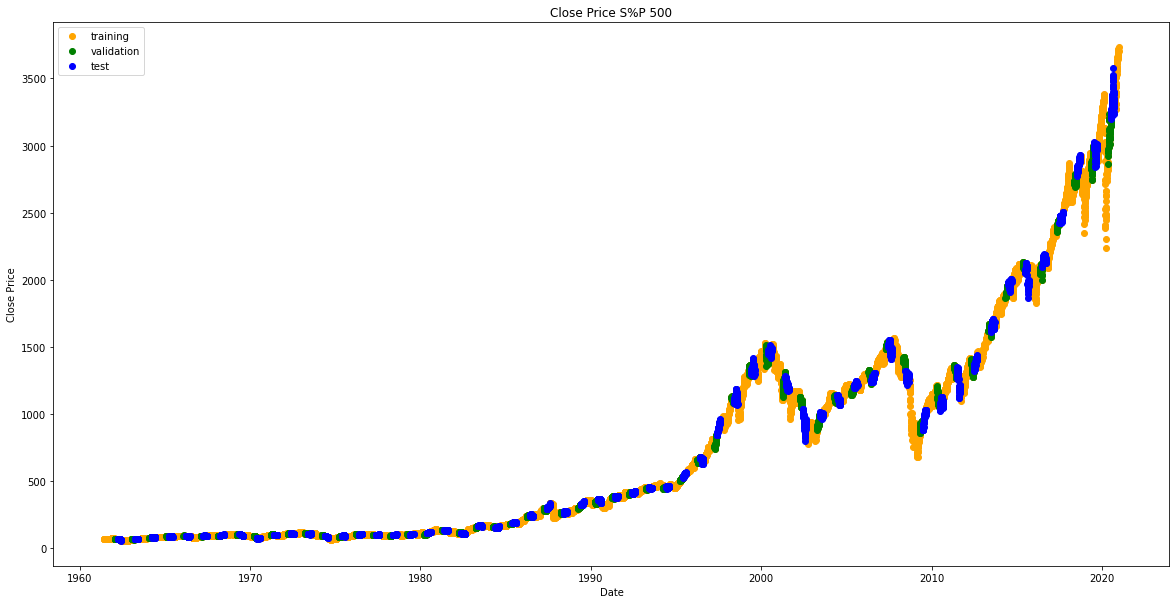

In [178]:
plt.figure(figsize=(20, 10));
plt.plot(date_train, price_train[:,0], color = 'orange', label = 'training', marker= 'o', linestyle='None')
plt.plot(date_val, price_val[:,0], color = 'green', label = 'validation', marker= 'o', linestyle='None')
plt.plot(date_test, price_test[:,0], color = 'blue', label = 'test', marker= 'o', linestyle='None')
plt.title('Close Price S%P 500')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import shutil
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

### Now, we traing the RNN model

In [97]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
rnn = RNN(input_size, output_size, hidden_size, num_layers)
opt = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
limit = nn.MSELoss()

In [98]:
rnn

RNN(
  (rnn): RNN(3, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=4, bias=True)
)

In [99]:
for i, j in rnn.named_parameters():
    print(i)
    print(j.data.shape)

rnn.weight_ih_l0
torch.Size([16, 3])
rnn.weight_hh_l0
torch.Size([16, 16])
rnn.bias_ih_l0
torch.Size([16])
rnn.bias_hh_l0
torch.Size([16])
fc.weight
torch.Size([4, 16])
fc.bias
torch.Size([4])


In [100]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
loss_all_1 = []
loss_all_1_val = []
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(X_train).float())
    labels = Variable(torch.from_numpy(y_train).float())
    
    optimiser.zero_grad()

    output, hidden = rnn(inputs)   
    
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_all_1 += [loss.item()]
       
    loss.backward(retain_graph=True)
       
    inputs_val = torch.from_numpy(X_val).float()
    labels_val = torch.from_numpy(y_val).float()
    output_val, hidden_val = rnn(inputs_val)
    loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
    loss_all_1_val += [loss_val.item()]
    
    if (epoch % 10 == 0 ):
        print("Epoch ", epoch, "MSE: ", loss.item())
    
    optimiser.step()                                


Epoch  0 MSE:  0.14543604850769043
Epoch  10 MSE:  0.09183415025472641
Epoch  20 MSE:  0.06023930385708809
Epoch  30 MSE:  0.04439503699541092
Epoch  40 MSE:  0.040096912533044815
Epoch  50 MSE:  0.03813532367348671
Epoch  60 MSE:  0.03562324121594429
Epoch  70 MSE:  0.033125296235084534
Epoch  80 MSE:  0.030118945986032486
Epoch  90 MSE:  0.026277905330061913


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


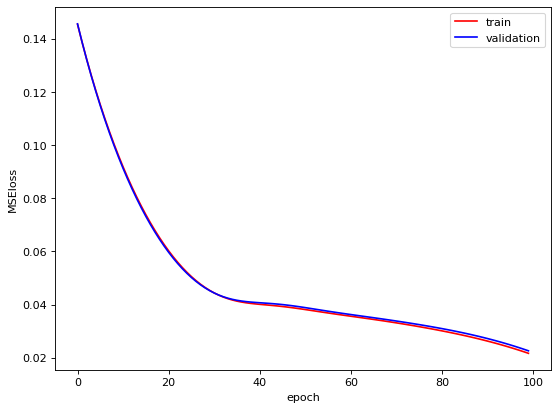

In [229]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_all_1), 'r', label = 'train')
plt.plot(np.array(loss_all_1_val), 'b', label = 'validation')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt.savefig('MSEloss_1.eps')

### From the plot of MSE loss above, we could see that the MSE of training set and validation set are quite similar. The loss for the validation set keep decrease. Therefore, no overfitting issue. However, based on the prediction plot shown below, there is a significant underfitting issue.

In [230]:
out_temp = np.concatenate((output.detach().numpy()[:, [0]], 
                           output.detach().numpy()[:, [0]],
                           output.detach().numpy()[:, [0]]), axis=1)
out_temp.shape
predicted_price = sc.inverse_transform(out_temp)[:, [0]]
predicted_price

array([[ 4597.9326],
       [16353.488 ],
       [20039.834 ],
       ...,
       [-5932.5073],
       [-6453.5723],
       [-5291.143 ]], dtype=float32)

In [231]:
predicted_price.shape

(3127, 1)

In [235]:
date_train.shape

(11864, 1)

In [272]:
plt.figure(figsize=(20, 10));
plt.plot(df.Date, data[:,0], color = 'orange', label = 'Real')
plt.plot(date_train, predicted_price, color = 'blue', label = 'Pred')
plt.title('S&P 500 Close Price Prediction in training set')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.show()

### Accuracy will be computed in terms of error defined as prediction_error := |predicted_price - actual_price| / actual_price 

In [105]:
def prediction_error(target, pred):
    error = abs(pred - target)/target
    return error

In [106]:
out_temp = np.concatenate( (y_train[:, :, 0], y_train[:, :, 0], y_train[:, :, 0]), axis = 1)
target_train = sc.inverse_transform(out_temp)[:, [0]]
error_train_1 = prediction_error(target_train, predicted_price)

In [107]:
train_inputs = Variable(torch.from_numpy(X_train).float())
output_train, _ = rnn(train_inputs)
out_temp = np.concatenate((output_train.detach().numpy()[:, [1]], 
                           output_train.detach().numpy()[:, [1]], 
                           output_train.detach().numpy()[:, [1]]), axis=1)
predicted_price_train = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_train[:, :, 1], y_train[:, :, 1], y_train[:, :, 1]), axis = 1)
target_train = sc.inverse_transform(out_temp)[:, [0]]
error_train_2 = prediction_error(target_train, predicted_price_train)
predicted_price_train

array([[ 660.2104 ],
       [ 663.74713],
       [ 661.9752 ],
       ...,
       [1686.4456 ],
       [1685.9635 ],
       [1687.7115 ]], dtype=float32)

In [108]:

out_temp = np.concatenate((output_train.detach().numpy()[:, [2]], 
                           output_train.detach().numpy()[:, [2]], 
                           output_train.detach().numpy()[:, [2]]), axis=1)
predicted_price_train = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_train[:, :, 2], y_train[:, :, 2], y_train[:, :, 2]), axis = 1)
target_train = sc.inverse_transform(out_temp)[:, [0]]
error_train_3 = prediction_error(target_train, predicted_price_train)
predicted_price_train

array([[ 743.15393],
       [ 738.19934],
       [ 742.0808 ],
       ...,
       [1528.2888 ],
       [1528.5005 ],
       [1530.3759 ]], dtype=float32)

In [109]:

out_temp = np.concatenate((output_train.detach().numpy()[:, [3]], 
                           output_train.detach().numpy()[:, [3]], 
                           output_train.detach().numpy()[:, [3]]), axis=1)
predicted_price_train = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_train[:, :, 3], y_train[:, :, 3], y_train[:, :, 3]), axis = 1)
target_train = sc.inverse_transform(out_temp)[:, [0]]
error_train_4 = prediction_error(target_train, predicted_price_train)
predicted_price_train

array([[ 685.3771 ],
       [ 687.41583],
       [ 687.1837 ],
       ...,
       [2155.3235 ],
       [2155.2    ],
       [2158.9177 ]], dtype=float32)

### Graph prediction_error as a function of timestamp (e.g., DD/MM/YYYY) for all data in the Training Set. 

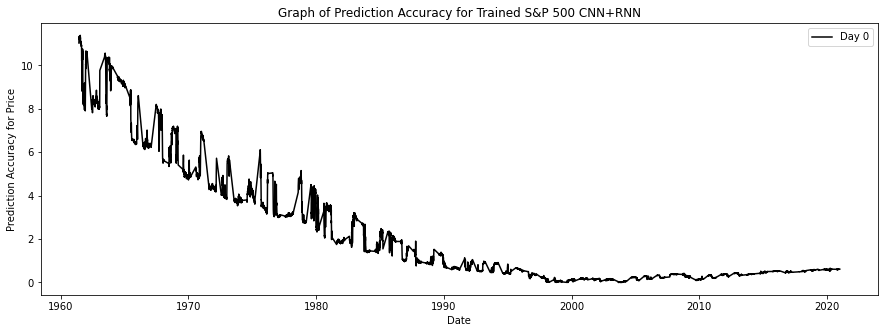

In [120]:
plt.figure(figsize=(15, 5));
plt.plot(date_train, error_train_1, color = 'black', label = 'Day 0')

plt.title('Graph of Prediction Accuracy for Trained S&P 500 CNN+RNN')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price')
plt.legend()
plt.show()

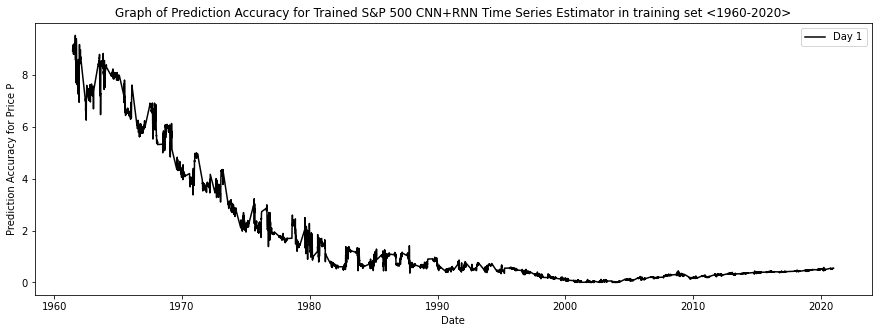

In [121]:
plt.figure(figsize=(15, 5));
plt.plot(date_train+ pd.Timedelta('1 day'), error_train_2, color = 'black', label = 'Day 1')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 CNN+RNN Time Series Estimator in training set <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

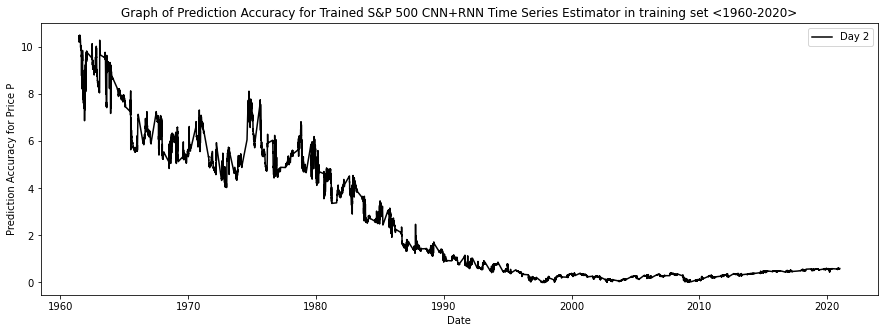

In [122]:
plt.figure(figsize=(15, 5));
plt.plot(date_train+ pd.Timedelta('2 day'), error_train_3, color = 'black', label = 'Day 2')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 CNN+RNN Time Series Estimator in training set <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

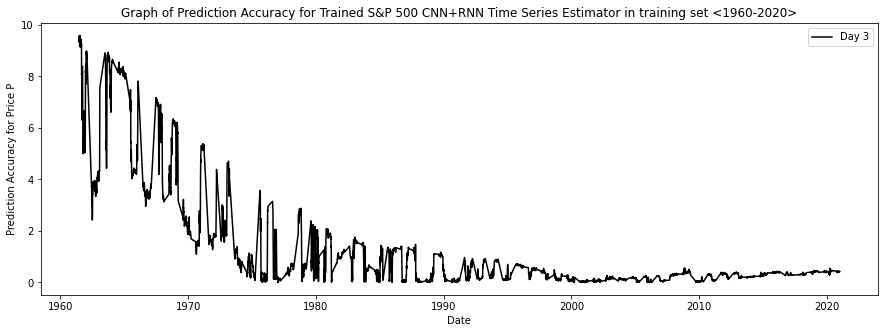

In [123]:
plt.figure(figsize=(15, 5));
plt.plot(date_train+ pd.Timedelta('3 day'), error_train_4, color = 'black', label ='Day 3')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 CNN+RNN Time Series Estimator in training set <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

In [124]:
test_inputs = Variable(torch.from_numpy(X_test).float())
output_test, _ = rnn(test_inputs)
out_temp = np.concatenate((output_test.detach().numpy()[:, [0]], 
                           output_test.detach().numpy()[:, [0]], 
                           output_test.detach().numpy()[:, [0]]), axis=1)
predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
predicted_price_test

array([[ 619.6259 ],
       [ 617.24176],
       [ 617.42633],
       ...,
       [1321.4407 ],
       [1330.1196 ],
       [1322.3049 ]], dtype=float32)

In [125]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]

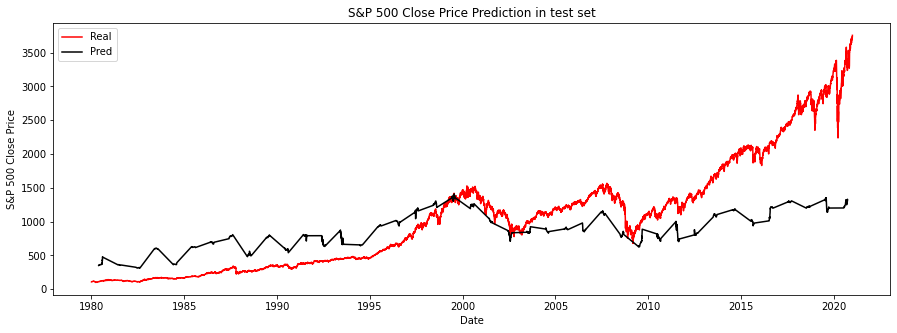

In [128]:
plt.figure(figsize=(15, 5));
plt.plot(df.Date[df.Date>myDatetime], data[df.Date>myDatetime,0], color = 'red', label = 'Real')
plt.plot(date_test_partial,
         predicted_price_test[date_test>myDatetime], color = 'black', label = 'Pred')
plt.title('S&P 500 Close Price Prediction in test set')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.legend()
plt.show()

In [129]:
out_temp = np.concatenate( (y_test[:, :, 0], y_test[:, :, 0], y_test[:, :, 0]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_test = prediction_error(target_test, predicted_price_test)

In [130]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]
error_partial_1 = error_test[date_test>myDatetime]

In [ ]:

out_temp = np.concatenate((output_test.detach().numpy()[:, [1]], 
                           output_test.detach().numpy()[:, [1]], 
                           output_test.detach().numpy()[:, [1]]), axis=1)
predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]

In [131]:

out_temp = np.concatenate( (y_test[:, :, 1], y_test[:, :, 1], y_test[:, :, 1]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_test = prediction_error(target_test, predicted_price_test)
predicted_price_test

array([[ 606.33295],
       [ 602.06305],
       [ 600.0992 ],
       ...,
       [1516.5815 ],
       [1515.0225 ],
       [1508.8641 ]], dtype=float32)

In [132]:
error_partial_2 = error_test[date_test>myDatetime]

In [133]:

out_temp = np.concatenate((output_test.detach().numpy()[:, [2]], 
                           output_test.detach().numpy()[:, [2]], 
                           output_test.detach().numpy()[:, [2]]), axis=1)
predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_test[:, :, 2], y_test[:, :, 2], y_test[:, :, 2]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_test = prediction_error(target_test, predicted_price_test)
predicted_price_test

array([[ 597.1413 ],
       [ 600.1376 ],
       [ 599.98206],
       ...,
       [1450.5813 ],
       [1423.0232 ],
       [1436.5676 ]], dtype=float32)

In [134]:
error_partial_3 = error_test[date_test>myDatetime]

In [135]:

out_temp = np.concatenate((output_test.detach().numpy()[:, [3]], 
                           output_test.detach().numpy()[:, [3]], 
                           output_test.detach().numpy()[:, [3]]), axis=1)
predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_test[:, :, 3], y_test[:, :, 3], y_test[:, :, 3]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_test = prediction_error(target_test, predicted_price_test)
predicted_price_test

array([[ 401.41583],
       [ 399.0577 ],
       [ 399.0683 ],
       ...,
       [1918.4612 ],
       [1898.4148 ],
       [1897.2244 ]], dtype=float32)

In [136]:
error_partial_4 = error_test[date_test>myDatetime]

### Graph prediction_error as a function of timestamp (e.g., DD/MM/YYYY) for all data in the Test Set. 

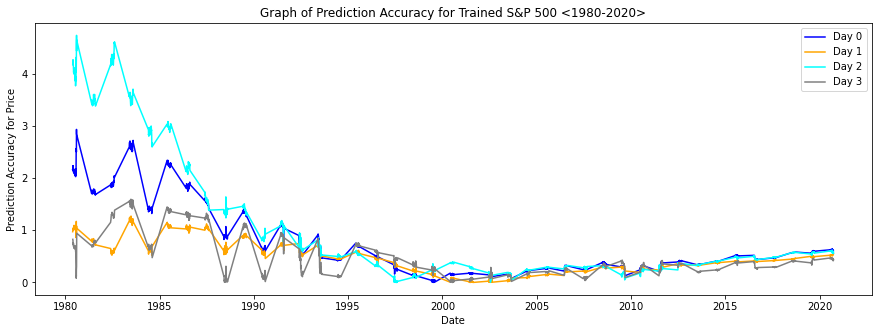

In [139]:
plt.figure(figsize=(15, 5));
plt.plot(date_test_partial, error_partial_1, color = 'blue', label = 'Day 0')
plt.plot(date_test_partial+ pd.Timedelta('1 day'), error_partial_2, color = 'orange', label = 'Day 1')
plt.plot(date_test_partial+ pd.Timedelta('2 day'), error_partial_3, color = 'cyan', label = 'Day 2')
plt.plot(date_test_partial+ pd.Timedelta('3 day'), error_partial_4, color = 'grey', label = 'Day 3')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 <1980-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price')
plt.legend()
plt.show()

## Step 6 - Optimize your CNN+RNN algorithm's performance to yield maximum achievable accuracy (e.g., minimum predicted_error) over the entire Training Set and Test Set.  

### reconstruct the training set and test set. (No validation set at this time)

In [140]:

X_full = []
y_full = []
date_full = []
for i in range(window_size , n_rows - window_size - output_size +1):
    X_full.append(dt_scal[i:i+window_size, ])
    y_full.append(dt_scal[i+window_size: i+ window_size + output_size, 0])
    date_full.append(dt_data[i+window_size])
    
X_full, y_full, date_full = np.array(X_full), np.array(y_full), np.array(date_full)
y_full = np.reshape(y_full, (y_full.shape[0], 1, y_full.shape[1]))

In [141]:
X_full.shape

(14991, 180, 3)

In [142]:
X_train = []; y_train = []; date_train = []
X_test = []; y_test = []; date_test = []
for i in range(X_full.shape[0]):
    if(i  %  253 >= 200):
        X_test.append(X_full[i])
        y_test.append(y_full[i])
        date_test.append(date_full[i])
    else:
        X_train.append(X_full[i])
        y_train.append(y_full[i])
        date_train.append(date_full[i])
X_train, y_train, date_train = np.array(X_train), np.array(y_train), np.array(date_train)          
X_test, y_test, date_test = np.array(X_test), np.array(y_test), np.array(date_test)      

In [143]:
X_train.shape

(11864, 180, 3)

### To overcome the underfitting issue, we increase the number layer from 1 to 2, increase hidden unit size from 8 to 32. In addition, we increase the learning rate from 0.001 to 0.005 to speed up the learning process.

In [144]:
input_size = 3
hidden_size = 32
num_layers = 2
output_size = 4
num_epochs = 100
learning_rate = 0.005
window_size = 180

In [145]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
rnn = RNN(input_size, output_size, hidden_size, num_layers)
optimiser = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [146]:
rnn

RNN(
  (rnn): RNN(3, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=4, bias=True)
)

In [147]:
for name, param in rnn.named_parameters():
    print(name)
    print(param.data.shape)

rnn.weight_ih_l0
torch.Size([32, 3])
rnn.weight_hh_l0
torch.Size([32, 32])
rnn.bias_ih_l0
torch.Size([32])
rnn.bias_hh_l0
torch.Size([32])
rnn.weight_ih_l1
torch.Size([32, 32])
rnn.weight_hh_l1
torch.Size([32, 32])
rnn.bias_ih_l1
torch.Size([32])
rnn.bias_hh_l1
torch.Size([32])
fc.weight
torch.Size([4, 32])
fc.bias
torch.Size([4])


In [148]:
torch.manual_seed(1)
np.random.seed(1)
random.seed(1)
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(X_train).float())
    labels = Variable(torch.from_numpy(y_train).float())

    output, hidden = rnn(inputs) 
    
    loss = criterion(output.reshape(-1), labels.view(-1))
    
    if (epoch % 10 == 0 ):
        print("Epoch ", epoch, "MSE: ", loss.item())
    optimiser.zero_grad()

    loss.backward(retain_graph=True)

    optimiser.step()       

Epoch  0 MSE:  0.08096364140510559
Epoch  10 MSE:  0.011516567319631577
Epoch  20 MSE:  0.002119780983775854
Epoch  30 MSE:  0.001159961917437613
Epoch  40 MSE:  0.0003191700379829854
Epoch  50 MSE:  0.00029800573247484863
Epoch  60 MSE:  0.00017488456796854734
Epoch  70 MSE:  0.00014556292444467545
Epoch  80 MSE:  0.0001256035902770236
Epoch  90 MSE:  0.00010839196329470724


In [151]:
all_inputs = Variable(torch.from_numpy(X_full).float())
output_all, _ = rnn(all_inputs)

In [152]:
idx = 0
out_temp = np.concatenate((output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]]), axis=1)
predicted_price_all = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_full[:, :, idx], y_full[:, :, idx], y_full[:, :, idx]), axis = 1)
target_all = sc.inverse_transform(out_temp)[:, [0]]
error_all_1 = prediction_error(target_all, predicted_price_all)
predicted_price_all

array([[  55.51483],
       [  56.64342],
       [  57.14407],
       ...,
       [3467.825  ],
       [3462.3855 ],
       [3462.5986 ]], dtype=float32)

In [153]:
idx = 1
out_temp = np.concatenate((output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]]), axis=1)
predicted_price_all = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_full[:, :, idx], y_full[:, :, idx], y_full[:, :, idx]), axis = 1)
target_all = sc.inverse_transform(out_temp)[:, [0]]
error_all_2 = prediction_error(target_all, predicted_price_all)
predicted_price_all

array([[  51.339058],
       [  50.77148 ],
       [  50.88032 ],
       ...,
       [3447.3398  ],
       [3442.0398  ],
       [3443.0012  ]], dtype=float32)

In [154]:
idx = 2
out_temp = np.concatenate((output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]]), axis=1)
predicted_price_all = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_full[:, :, idx], y_full[:, :, idx], y_full[:, :, idx]), axis = 1)
target_all = sc.inverse_transform(out_temp)[:, [0]]
error_all_3 = prediction_error(target_all, predicted_price_all)
predicted_price_all

array([[  57.838882],
       [  57.454678],
       [  58.83475 ],
       ...,
       [3493.4075  ],
       [3489.0645  ],
       [3491.1084  ]], dtype=float32)

In [155]:
idx = 3
out_temp = np.concatenate((output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]], 
                           output_all.detach().numpy()[:, [idx]]), axis=1)
predicted_price_all = sc.inverse_transform(out_temp)[:, [0]]
out_temp = np.concatenate( (y_full[:, :, idx], y_full[:, :, idx], y_full[:, :, idx]), axis = 1)
target_all = sc.inverse_transform(out_temp)[:, [0]]
error_all_4 = prediction_error(target_all, predicted_price_all)
predicted_price_all

array([[  41.360905],
       [  42.823605],
       [  42.607197],
       ...,
       [3364.5015  ],
       [3359.9165  ],
       [3361.8413  ]], dtype=float32)

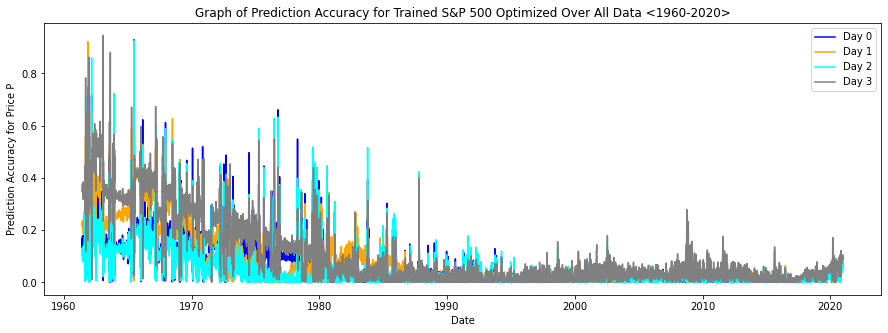

In [157]:
plt.figure(figsize=(15, 5));
plt.plot(date_full, error_all_1, color = 'blue', label = 'Day 0')
plt.plot(date_full+ pd.Timedelta('1 day'), error_all_2, color = 'orange', label = 'Day 1')
plt.plot(date_full+ pd.Timedelta('2 day'), error_all_3, color = 'cyan', label = 'Day 2')
plt.plot(date_full+ pd.Timedelta('3 day'), error_all_4, color = 'grey', label = 't')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 Optimized Over All Data <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

### In order to see each case clearly, we also plot the four cases seperately

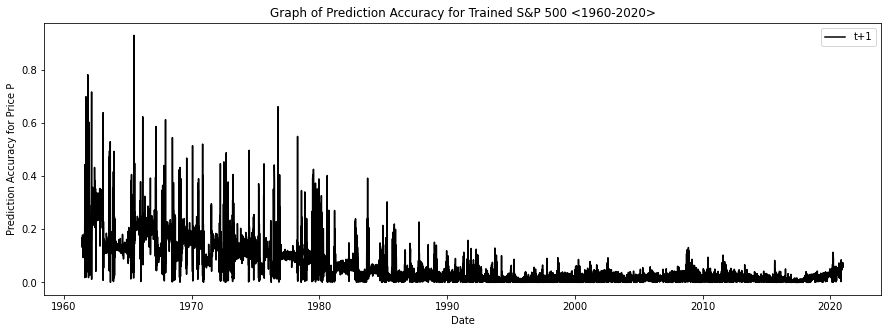

In [158]:
plt.figure(figsize=(15, 5));
plt.plot(date_full, error_all_1, color = 'black', label = 't+1')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

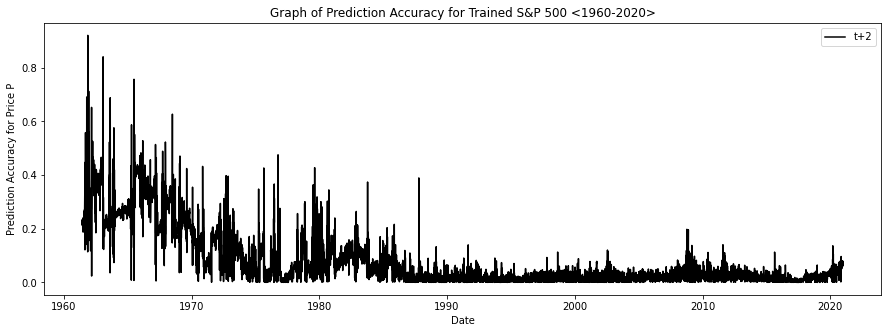

In [159]:
plt.figure(figsize=(15, 5));
plt.plot(date_full+ pd.Timedelta('1 day'), error_all_2, color = 'black', label = 't+2')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

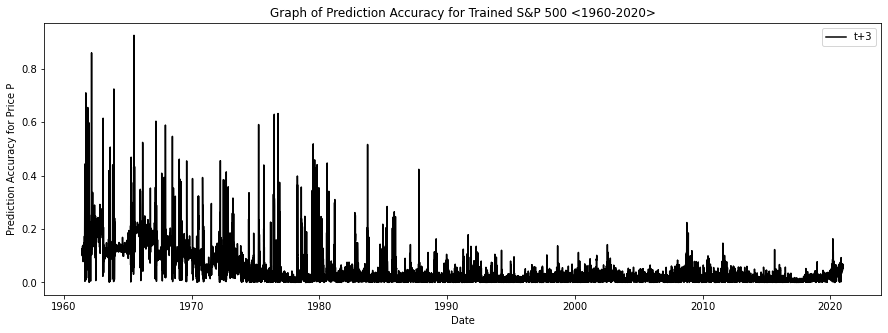

In [160]:
plt.figure(figsize=(15, 5));
plt.plot(date_full+ pd.Timedelta('2 day'), error_all_3, color = 'black', label = 't+3')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

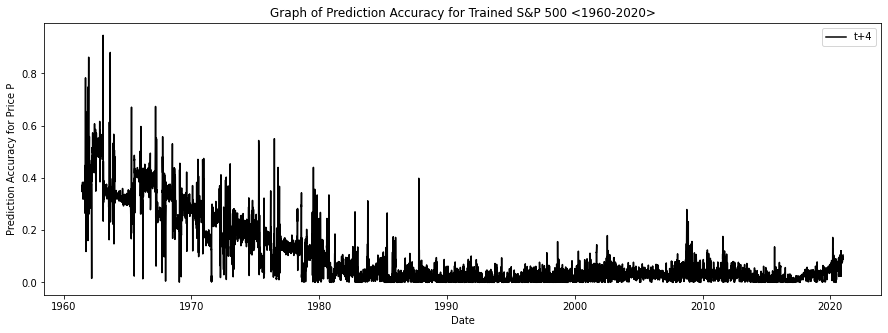

In [161]:
plt.figure(figsize=(15, 5));
plt.plot(date_full+ pd.Timedelta('3 day'), error_all_4, color = 'black', label = 't+4')
plt.title('Graph of Prediction Accuracy for Trained S&P 500 <1960-2020>')
plt.xlabel('Date')
plt.ylabel('Prediction Accuracy for Price P')
plt.legend()
plt.show()

## Step 7 - Enhance your CNN+RNN algorithm's functionality to generate a SELL signal when the S&P500 is about to peak, then use the algorithm you developed in Step 2 of this assignment to check your CNN+RNN algorthm's profitability against.the correlation-based result you computed in Step 2.  

In [162]:
X_full.shape

(14991, 180, 3)

In [164]:
money = 1
amt_full = []
trd_full = []
lst = -sam
for i in range(1,X_full.shape[0]):
    temp = sc.inverse_transform(X_full[i,:, :])
    prob_temp = temp[:, 2]
    tmp_pr = temp[:, 0]
    if prob_temp[sam-1] > 0.95 and (i-lst > sam):
    
        buy_pr = min(tmp_pr)
        if buy_pr > 0:
            sell_pr = tmp_pr[len(tmp_pr)-1]
            money = sell_pr/buy_pr*money
            lst = i
            print(buy_pr)
            print(sell_pr)
            print(money)
            print(i)   
            amt_full.append(money)
            trd_full.append(i)

52.200001
66.669998
1.277203002352433
1
52.32
66.199997
1.6160327776017211
416
64.099998
73.32
1.8484793596055682
597
69.610001
83.360001
2.2136078013445157
778
81.32
86.199997
2.3464459645237805
959
81.599998
93.949997
2.701575940328715
1162
73.199997
88.529999
3.2673569002431138
1449
88.239998
94.169998
3.486933360551303
1630
87.720001
102.309998
4.06689627311036
1825
69.290001
90.099998
5.288314919687342
2378
90.160004
108.889999
6.386918597701479
2714
104.739998
120.239998
7.332089880446519
2895
62.279999
88.099998
10.371822642501304
3476
82.089996
102.849998
12.99478608864366
3705
86.9
104.65
15.649072084885605
4308
92.49
101.82
17.2276842867667
4542
98.22
131.73
23.105302902624487
4848
102.42
133.88
30.202479521610687
5388
134.2
162.16
36.495037848169815
5569
147.82
175.48
43.32396997427168
5934
176.53
182.78
44.857844173213486
6115
186.08
250.84
60.46937678637613
6296
229.91
292.7799999999999
77.0050199448271
6477
256.98
299.44
89.7283180491829
6982
295.4599999999999
373.15
113.

### In 2020, our asset will be more than fourteen billion using CNN algorithm, which is much larger than using correlation algorithm in step 2.

In [165]:
money 

13037.3826767354

In [166]:
date_full.shape

(14991, 1)

In [167]:
X_full.shape

(14991, 180, 3)

Text(0, 0.5, 'Money (millions)')

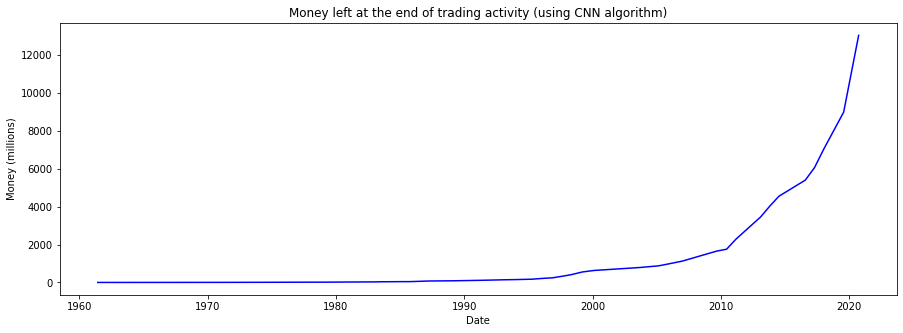

In [169]:
plt.figure(figsize=(15, 5));
plt.plot(date_full[trd_full],
         amt_full, color='blue', label='Close')
plt.title('Money left at the end of trading activity (using CNN algorithm)')
plt.xlabel('Date')
plt.ylabel('Money (millions)')

## Step 8 - Determine the Effect of Input Data Perturbations (Price Uncertainty) on your CNN+RNN Algorithm:

### 8a) Using your Optimized CNN+RNN algorithm (from Step 6, above) corrupt your Test Set that you used in Step 5, above:

### Add noise to the S&P 500 price data - NOT to the Schiller P/E data.

### You can scale the noise accordingly within your sampling window shown in FIgure 2.

### Note that any negative values that result from noise corruption of S&P500 price data should be set to some small value greater than zero (you choose what that value is), for physical realism.

In [170]:
sd = [0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
def NoiseData(data, sigma):
    dataset_noise = np.ndarray(shape=data.shape, dtype=np.float32)
    random.seed(1)
    for i in range(len(data)):
        s = np.random.normal(0, sigma, 18)
        ind = random.sample(list(range(window_size)), 18)
        dataset_noise[i] = data[i] 
        s = max(X_test[1, ind, 0])*s
        temp = dataset_noise[i, ind, 0] + s
        temp[temp < 0] = 0.0000001
        dataset_noise[i, ind, 0]  = temp
        
    return dataset_noise   

### 8b) Repeat Tests in Step 6, above, with noise-corrupted Test Set.

In [171]:
idx = 0
out_temp = np.concatenate( (y_test[:, :, idx], y_test[:, :, idx], y_test[:, :, idx]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    test_inputs = Variable(torch.from_numpy(dataset_test_noise).float())
    output_test, _ = rnn(test_inputs)
    out_temp = np.concatenate((output_test.detach().numpy()[:, [idx]], 
                               output_test.detach().numpy()[:, [idx]],  
                               output_test.detach().numpy()[:, [idx]]), axis=1)
    predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
    error = prediction_error(target_test, predicted_price_test)
    error_res_all.append(error.reshape(-1))

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


In [179]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]
error_res_all_partial_1 = []
for i in range(len(sd)):
    temp = error_res_all[i].reshape(-1, 1)
    temp = temp[date_test > myDatetime,]
    error_res_all_partial_1.append(temp)

In [181]:
labels = date_test_partial
error_df=pd.DataFrame(error_res_all_partial_1, columns=labels, index=sd).T
error_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
1980-05-23,0.087844,0.087843,0.087844,0.087844,0.087843,0.087844,0.087844,0.087844,0.087843,0.087844
1980-05-27,0.085673,0.085674,0.085673,0.085673,0.085674,0.085673,0.085673,0.085673,0.085674,0.085674
1980-05-28,0.066195,0.066206,0.066189,0.066188,0.066089,0.066087,0.066421,0.066994,0.068189,0.062580
1980-05-29,0.039369,0.039369,0.039368,0.039366,0.039370,0.039355,0.039390,0.039402,0.039445,0.039373
1980-05-30,0.078065,0.078036,0.077976,0.078050,0.077944,0.079326,0.077885,0.079067,0.073656,0.073891
...,...,...,...,...,...,...,...,...,...,...
2020-09-21,0.019596,0.019596,0.019596,0.019596,0.019596,0.019596,0.019596,0.019596,0.019596,0.019598
2020-09-22,0.036141,0.036141,0.036140,0.036140,0.036141,0.036140,0.036140,0.036140,0.036140,0.036141
2020-09-23,0.016641,0.016641,0.016637,0.016645,0.016632,0.016646,0.016671,0.016642,0.016527,0.016457
2020-09-24,0.030170,0.030170,0.030170,0.030170,0.030170,0.030170,0.030170,0.030170,0.030170,0.030170


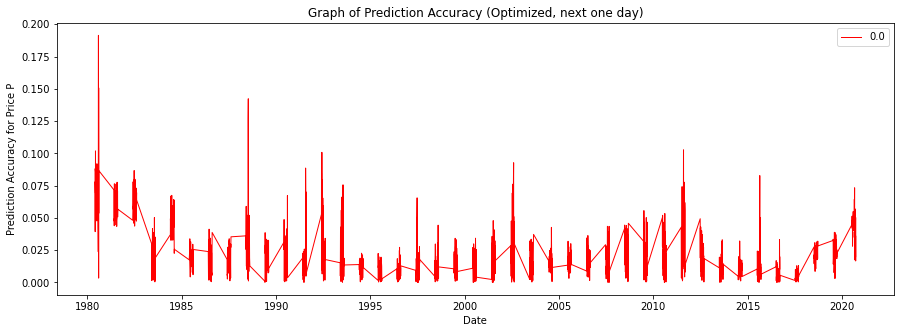

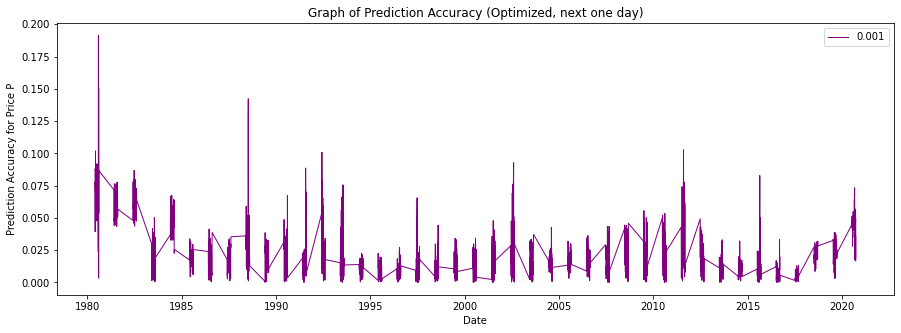

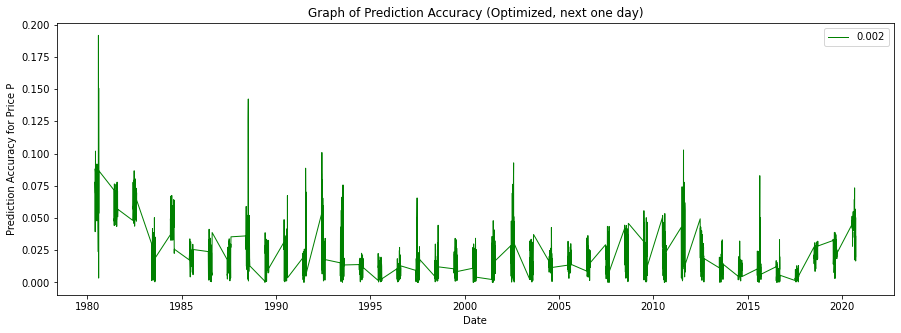

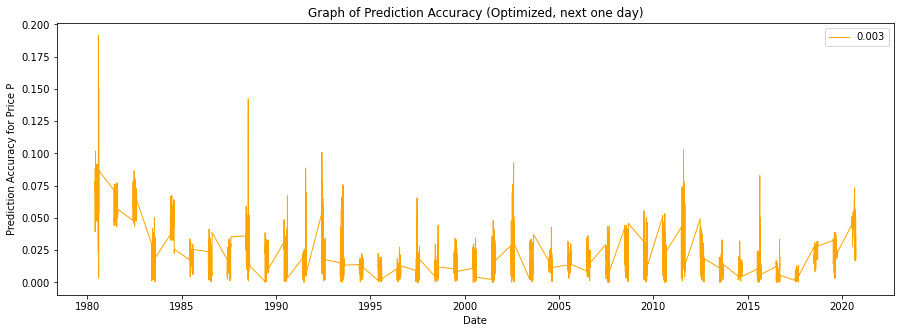

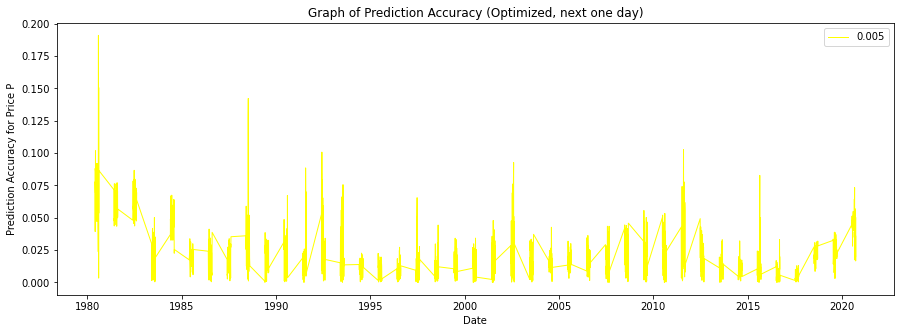

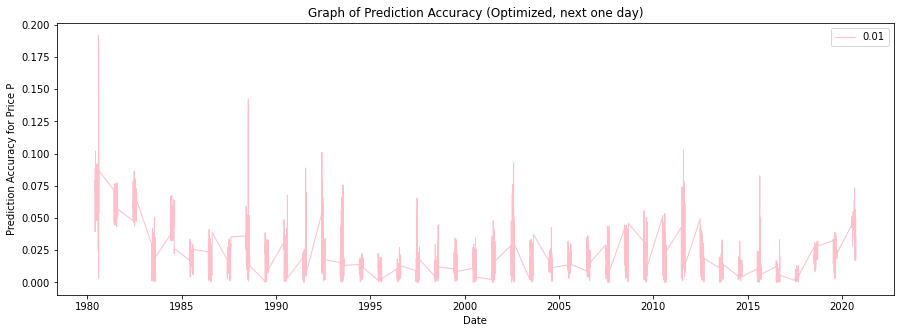

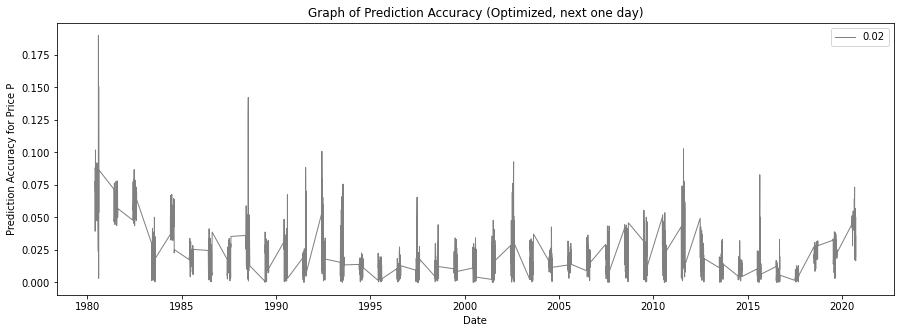

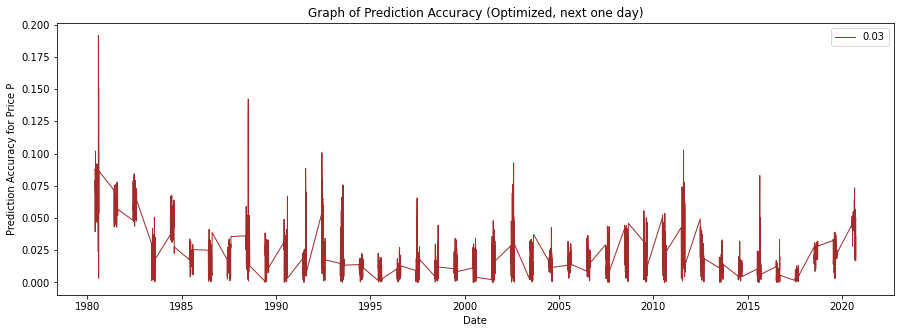

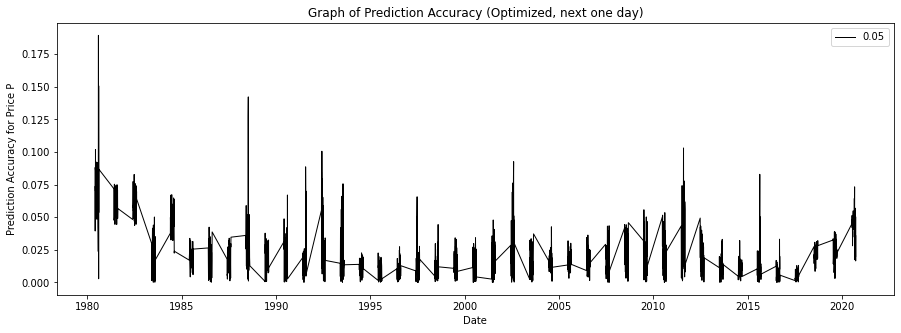

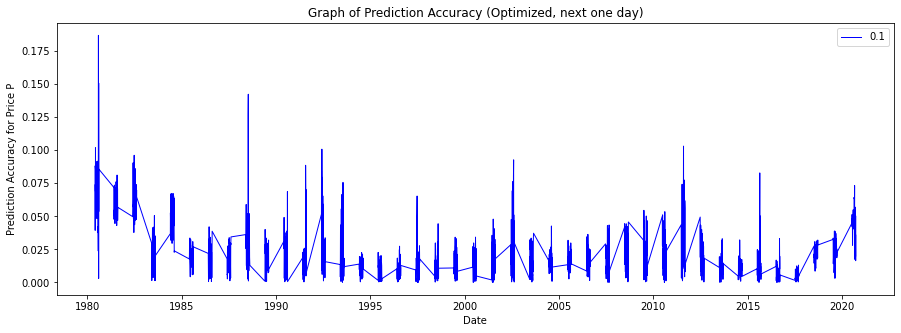

In [215]:
cmaps= ['red','purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue' ]
for i in range(len(sd)):    
    plt.figure(1, figsize=(15, 5))
    plt.plot(date_test_partial, error_res_all_partial_1[i], color=cmaps[i], lw=1, label = sd[i])  
    plt.xlabel('Date')
    plt.ylabel('Prediction Accuracy for Price P')
    plt.title('Graph of Prediction Accuracy (Optimized, next one day)')

    plt.legend(loc="upper right") 
    plt.show()

In [187]:
idx = 1
out_temp = np.concatenate( (y_test[:, :, idx], y_test[:, :, idx], y_test[:, :, idx]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    test_inputs = Variable(torch.from_numpy(dataset_test_noise).float())
    output_test, _ = rnn(test_inputs)
    out_temp = np.concatenate((output_test.detach().numpy()[:, [idx]], 
                               output_test.detach().numpy()[:, [idx]],  
                               output_test.detach().numpy()[:, [idx]]), axis=1)
    predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
    error = prediction_error(target_test, predicted_price_test)
    error_res_all.append(error.reshape(-1))

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


In [188]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]
error_res_all_partial_2 = []
for i in range(len(sd)):
    temp = error_res_all[i].reshape(-1, 1)
    temp = temp[date_test > myDatetime,]
    error_res_all_partial_2.append(temp)

In [191]:
labels = date_test_partial + pd.Timedelta('1 day')
error_df=pd.DataFrame(error_res_all_partial_2, columns=labels, index=sd).T
error_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
1980-05-24,0.043876,0.043876,0.043876,0.043876,0.043875,0.043875,0.043876,0.043876,0.043876,0.043875
1980-05-28,0.046611,0.046610,0.046611,0.046611,0.046610,0.046611,0.046611,0.046611,0.046610,0.046611
1980-05-29,0.089332,0.089295,0.089476,0.089364,0.089180,0.090075,0.090182,0.090315,0.089723,0.085162
1980-05-30,0.082071,0.082071,0.082073,0.082072,0.082066,0.082075,0.082052,0.082055,0.082054,0.081951
1980-05-31,0.074124,0.074165,0.073947,0.074121,0.074457,0.073525,0.076927,0.069870,0.076289,0.067561
...,...,...,...,...,...,...,...,...,...,...
2020-09-22,0.032909,0.032909,0.032909,0.032909,0.032909,0.032909,0.032909,0.032909,0.032909,0.032909
2020-09-23,0.016504,0.016504,0.016504,0.016504,0.016504,0.016504,0.016505,0.016503,0.016503,0.016505
2020-09-24,0.025246,0.025246,0.025245,0.025246,0.025245,0.025250,0.025274,0.025197,0.025284,0.025175
2020-09-25,0.047594,0.047594,0.047594,0.047594,0.047594,0.047594,0.047594,0.047594,0.047594,0.047594


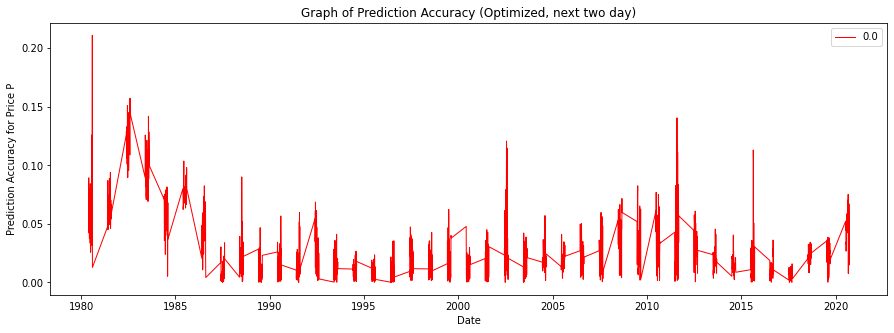

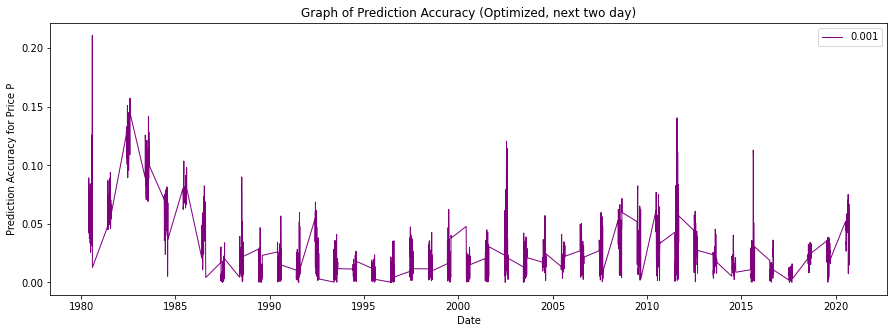

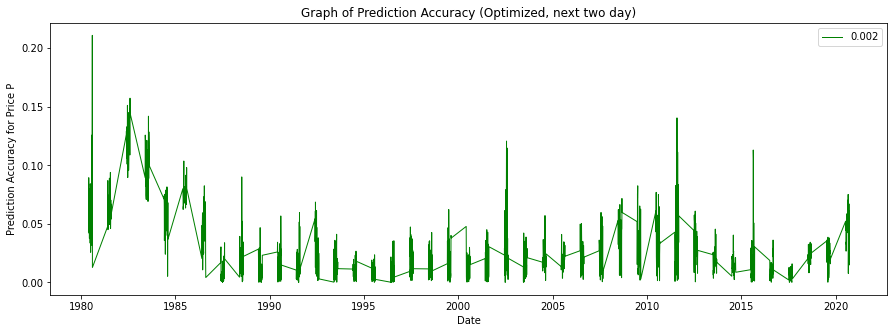

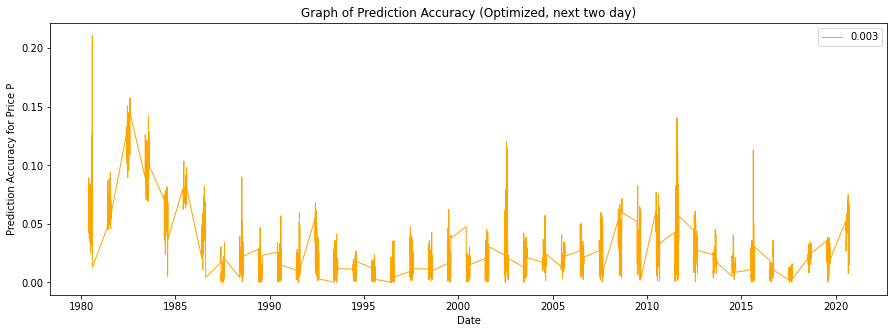

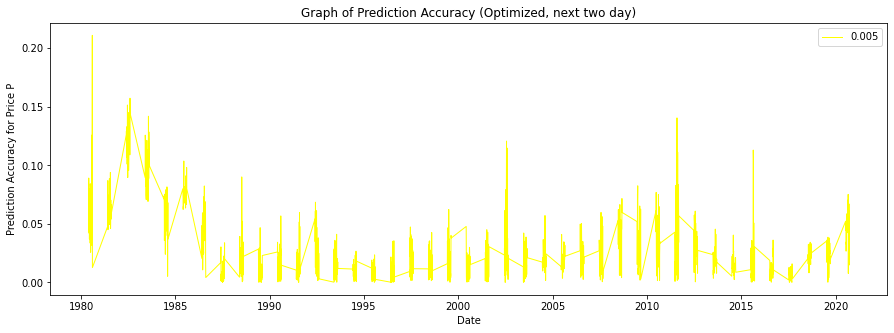

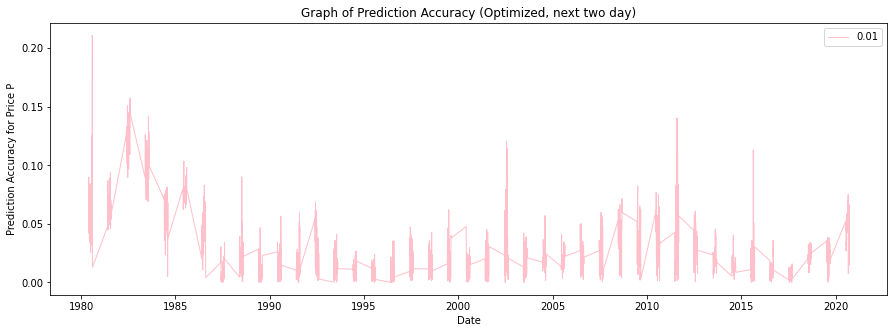

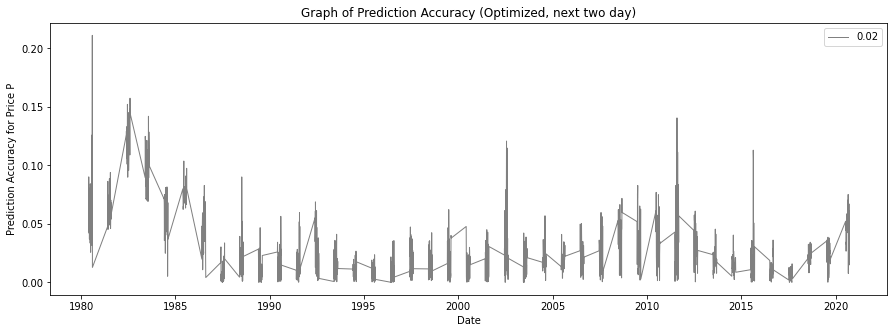

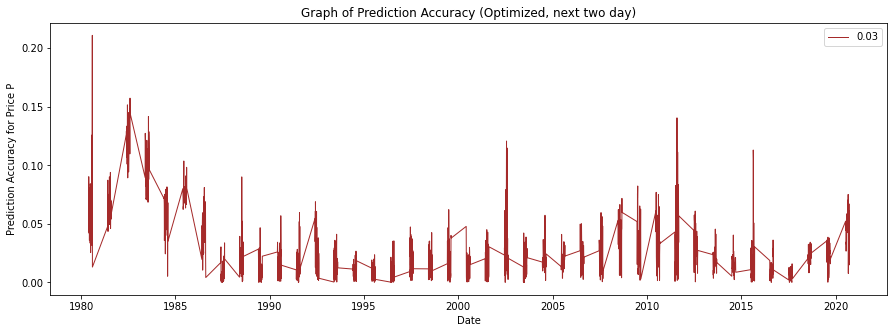

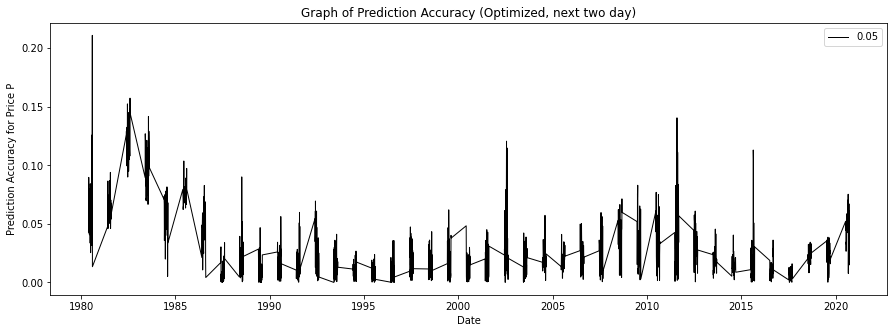

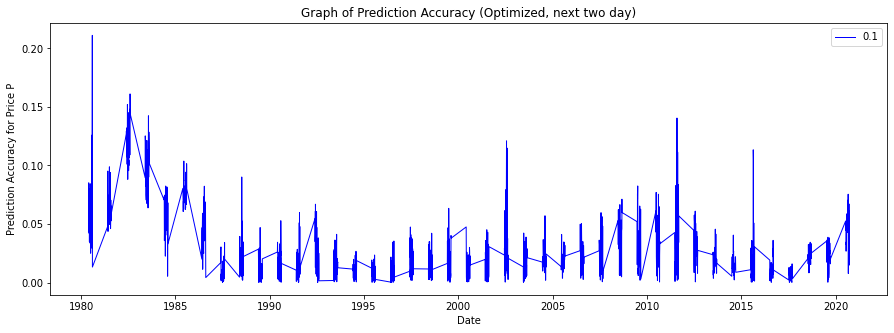

In [216]:
cmaps= ['red','purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue' ]

for i in range(len(sd)):    
    plt.figure(1, figsize=(15, 5))
    plt.plot(date_test_partial+ pd.Timedelta('1 day'), error_res_all_partial_2[i], color=cmaps[i], lw=1, label = sd[i])  
    plt.xlabel('Date')
    plt.ylabel('Prediction Accuracy for Price P')
    plt.title('Graph of Prediction Accuracy (Optimized, next two day)')
    plt.legend(loc="upper right") 
    plt.show()

In [194]:
idx = 2
out_temp = np.concatenate( (y_test[:, :, idx], y_test[:, :, idx], y_test[:, :, idx]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    test_inputs = Variable(torch.from_numpy(dataset_test_noise).float())
    output_test, _ = rnn(test_inputs)
    out_temp = np.concatenate((output_test.detach().numpy()[:, [idx]], 
                               output_test.detach().numpy()[:, [idx]],  
                               output_test.detach().numpy()[:, [idx]]), axis=1)
    predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
    error = prediction_error(target_test, predicted_price_test)
    error_res_all.append(error.reshape(-1))

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


In [195]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]
error_res_all_partial_3 = []
for i in range(len(sd)):
    temp = error_res_all[i].reshape(-1, 1)
    temp = temp[date_test > myDatetime,]
    error_res_all_partial_3.append(temp)

In [197]:
labels = date_test_partial + pd.Timedelta('2 day')
error_df=pd.DataFrame(error_res_all_partial_3, columns=labels, index=sd).T
error_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
1980-05-25,0.021169,0.021168,0.021169,0.021168,0.021169,0.021168,0.021169,0.021168,0.021169,0.021168
1980-05-29,0.007441,0.007441,0.007440,0.007441,0.007441,0.007441,0.007441,0.007441,0.007441,0.007440
1980-05-30,0.029842,0.029855,0.029935,0.029814,0.030069,0.029054,0.030925,0.027769,0.026926,0.021062
1980-05-31,0.023156,0.023153,0.023157,0.023164,0.023168,0.023139,0.023087,0.023171,0.022965,0.022986
1980-06-01,0.014796,0.014841,0.014743,0.014639,0.014770,0.013769,0.014123,0.014117,0.019425,0.009305
...,...,...,...,...,...,...,...,...,...,...
2020-09-23,0.000929,0.000929,0.000929,0.000929,0.000929,0.000929,0.000930,0.000929,0.000929,0.000929
2020-09-24,0.010323,0.010324,0.010323,0.010323,0.010323,0.010324,0.010324,0.010324,0.010324,0.010325
2020-09-25,0.031309,0.031309,0.031308,0.031306,0.031310,0.031307,0.031307,0.031293,0.031284,0.031276
2020-09-26,0.054969,0.054969,0.054969,0.054969,0.054969,0.054969,0.054969,0.054969,0.054969,0.054969


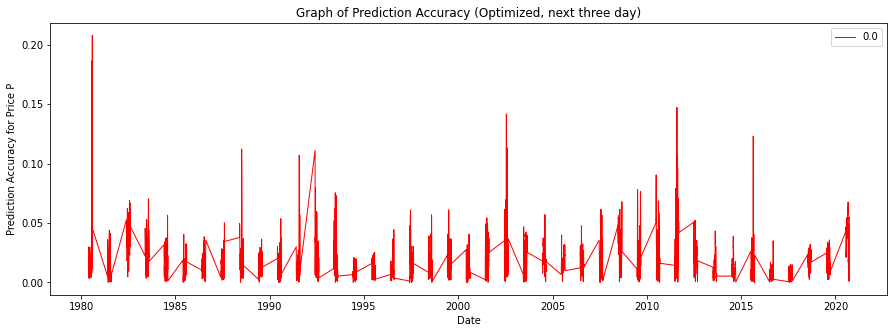

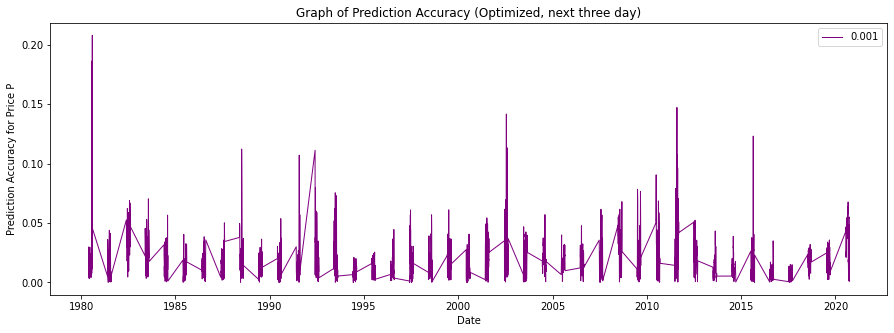

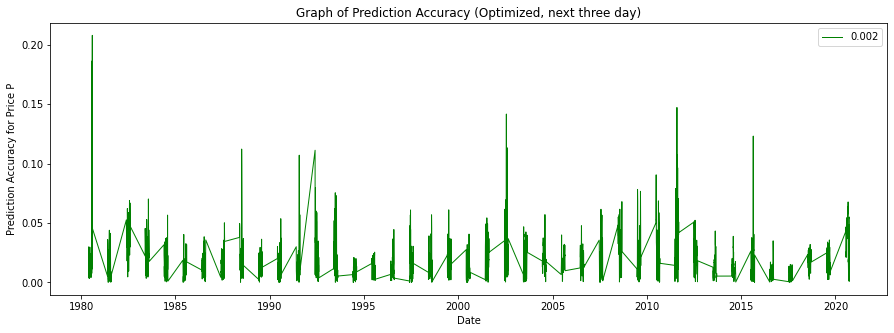

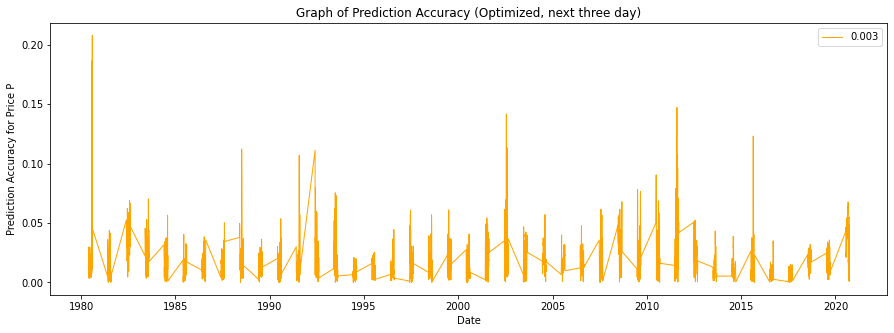

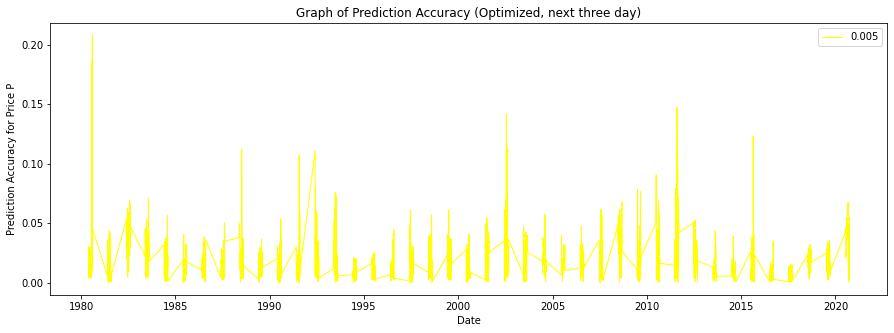

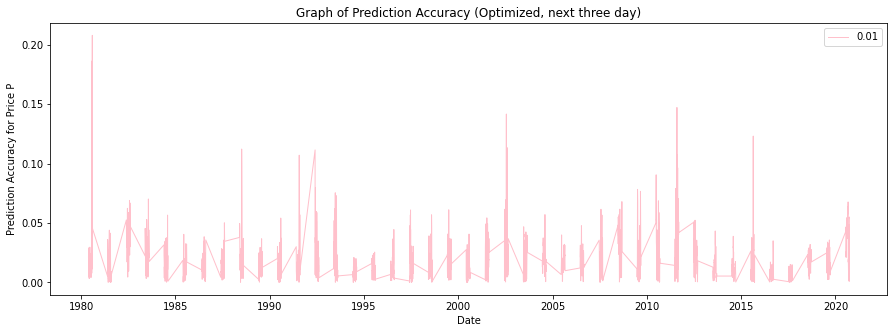

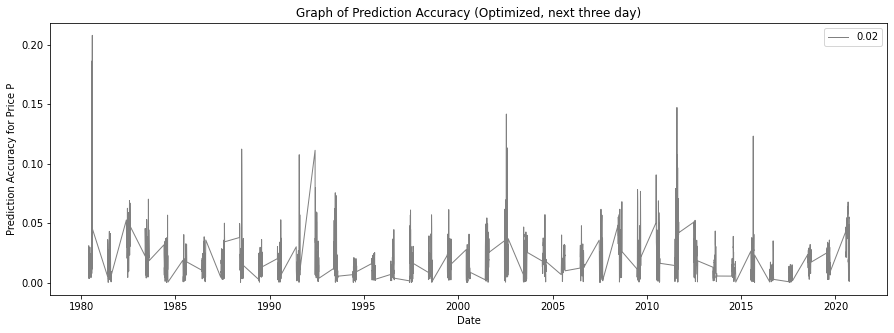

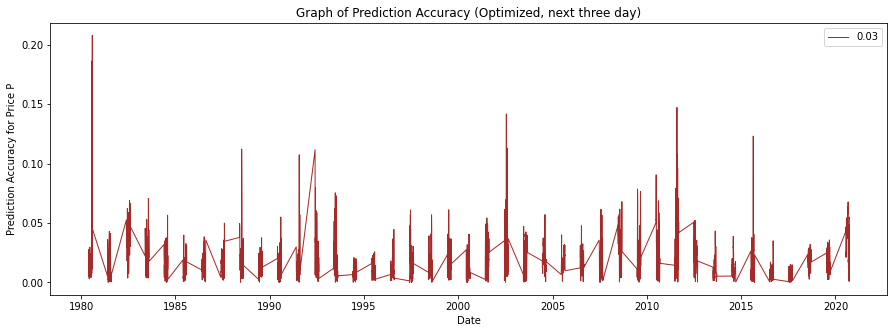

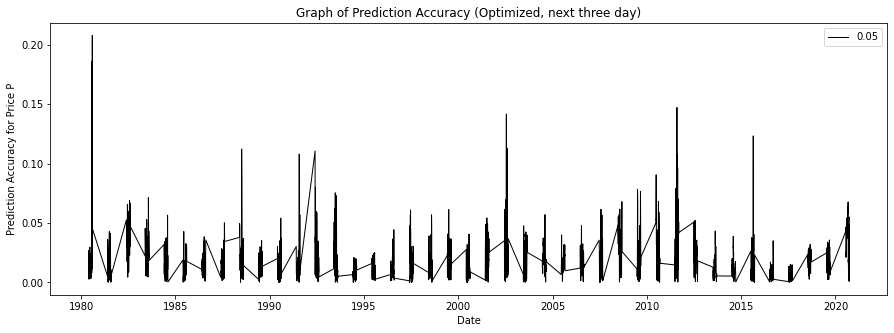

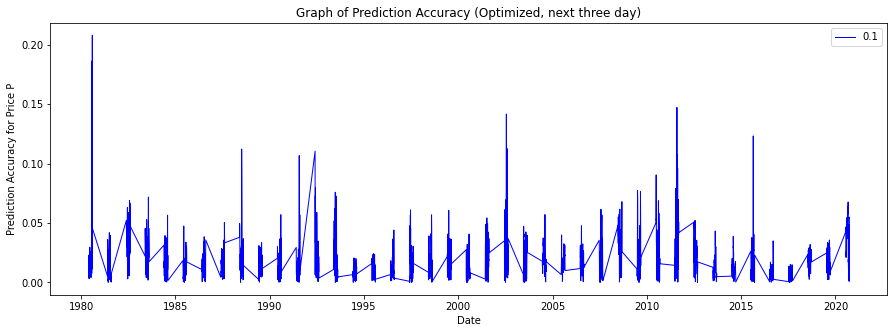

In [217]:
cmaps= ['red','purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue' ]
for i in range(len(sd)):
    plt.figure(1, figsize=(15, 5))
    plt.plot(date_test_partial+ pd.Timedelta('2 day'), error_res_all_partial_3[i], color=cmaps[i], lw=1, label = sd[i])  
    plt.xlabel('Date')
    plt.ylabel('Prediction Accuracy for Price P')
    plt.title('Graph of Prediction Accuracy (Optimized, next three day)')
    plt.legend(loc="upper right")
    plt.show()

In [200]:
idx = 3
out_temp = np.concatenate( (y_test[:, :, idx], y_test[:, :, idx], y_test[:, :, idx]), axis = 1)
target_test = sc.inverse_transform(out_temp)[:, [0]]
error_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    test_inputs = Variable(torch.from_numpy(dataset_test_noise).float())
    output_test, _ = rnn(test_inputs)
    out_temp = np.concatenate((output_test.detach().numpy()[:, [idx]], 
                               output_test.detach().numpy()[:, [idx]],  
                               output_test.detach().numpy()[:, [idx]]), axis=1)
    predicted_price_test = sc.inverse_transform(out_temp)[:, [0]]
    error = prediction_error(target_test, predicted_price_test)
    error_res_all.append(error.reshape(-1))

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


In [201]:
myDatetime = np.datetime64("1980-01-01")
date_test_partial = date_test[date_test>myDatetime]
error_res_all_partial_4 = []
for i in range(len(sd)):
    temp = error_res_all[i].reshape(-1, 1)
    temp = temp[date_test > myDatetime,]
    error_res_all_partial_4.append(temp)

In [203]:
labels = date_test_partial + pd.Timedelta('3 day')
error_df=pd.DataFrame(error_res_all_partial_4, columns=labels, index=sd).T
error_df

,0.000,0.001,0.002,0.003,0.005,0.010,0.020,0.030,0.050,0.100
1980-05-26,0.101664,0.101664,0.101663,0.101664,0.101664,0.101664,0.101664,0.101664,0.101664,0.101664
1980-05-30,0.097338,0.097338,0.097338,0.097338,0.097339,0.097339,0.097339,0.097338,0.097338,0.097339
1980-05-31,0.081033,0.081138,0.080961,0.081264,0.080917,0.081779,0.082082,0.077619,0.083551,0.072256
1980-06-01,0.063919,0.063920,0.063913,0.063900,0.063928,0.063902,0.063771,0.063782,0.063896,0.064368
1980-06-02,0.092560,0.092534,0.092740,0.092624,0.092288,0.091341,0.093871,0.092768,0.094522,0.096591
...,...,...,...,...,...,...,...,...,...,...
2020-09-24,0.033295,0.033295,0.033295,0.033295,0.033295,0.033295,0.033295,0.033295,0.033296,0.033295
2020-09-25,0.059533,0.059533,0.059533,0.059533,0.059533,0.059533,0.059533,0.059533,0.059533,0.059534
2020-09-26,0.077363,0.077364,0.077365,0.077366,0.077365,0.077360,0.077355,0.077380,0.077395,0.077340
2020-09-27,0.078324,0.078323,0.078323,0.078324,0.078323,0.078323,0.078323,0.078323,0.078324,0.078324


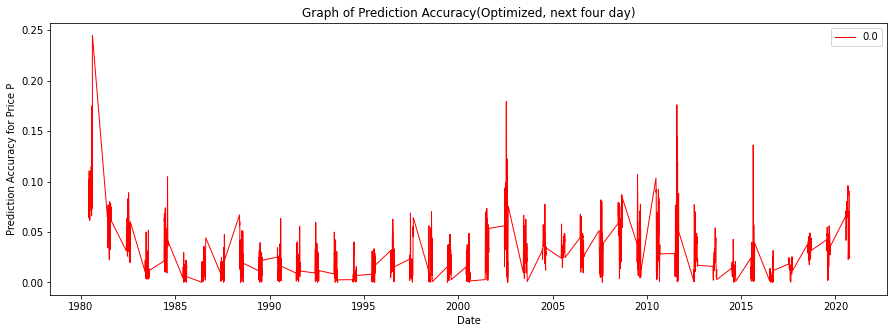

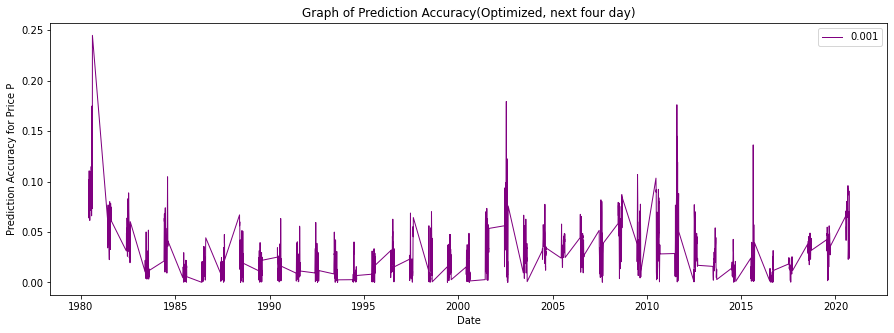

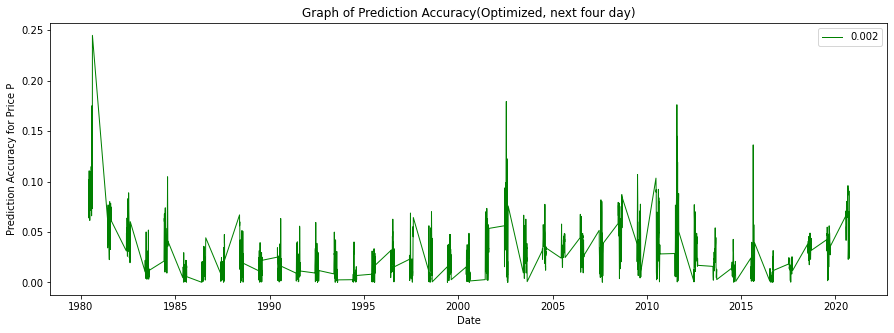

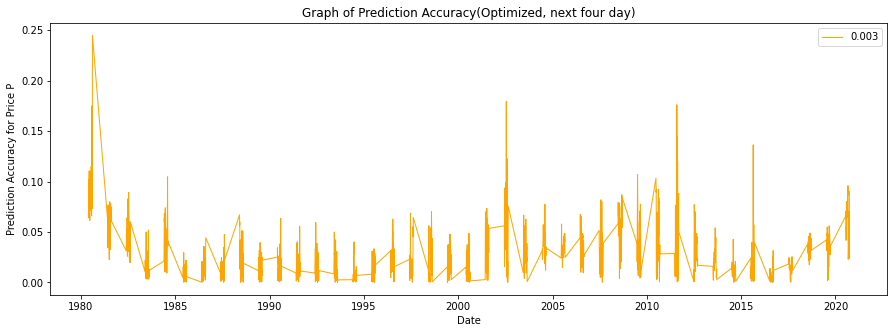

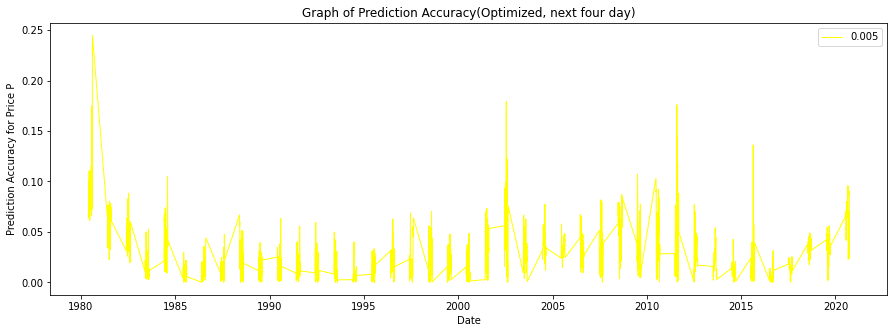

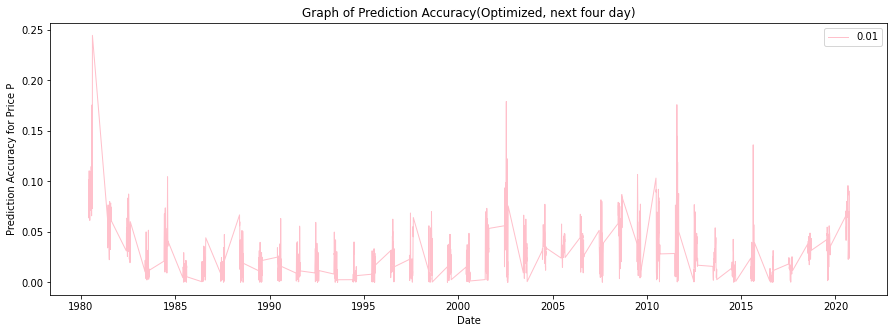

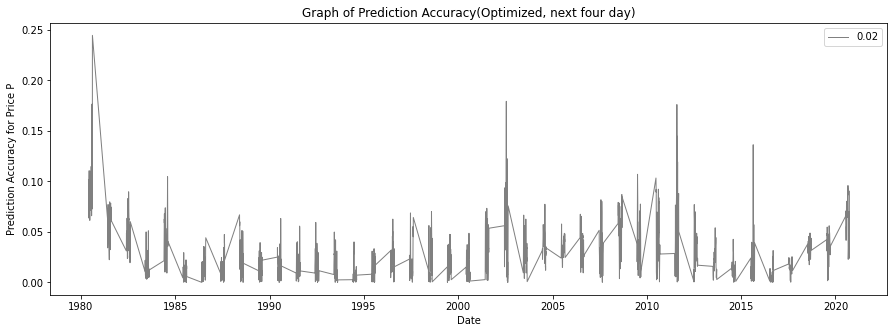

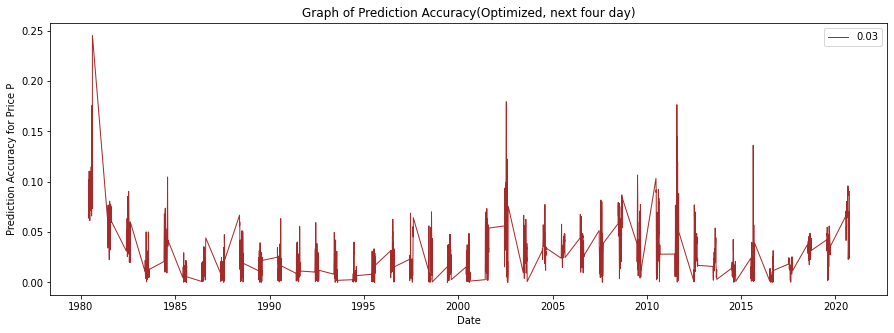

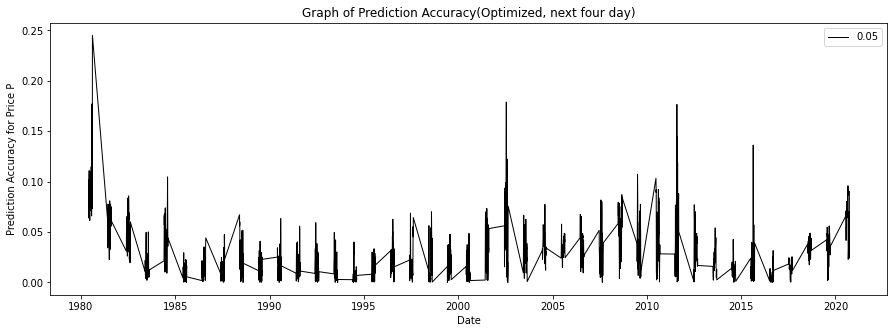

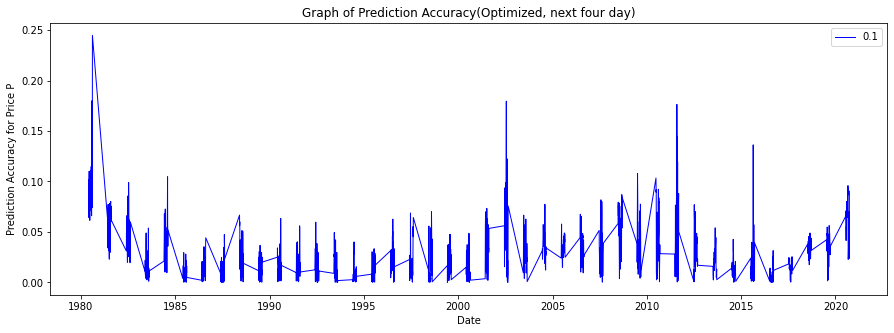

In [218]:
cmaps= ['red','purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue' ]

for i in range(len(sd)):    
    plt.figure(1, figsize=(15, 5))
    plt.plot(date_test_partial + pd.Timedelta('3 day'), error_res_all_partial_4[i], color=cmaps[i], lw=1, label = sd[i])  
    plt.xlabel('Date')
    plt.ylabel('Prediction Accuracy for Price P')
    plt.title('Graph of Prediction Accuracy(Optimized, next four day)')
    plt.legend(loc="upper right") 
    plt.show()

### 8c) Repeat Step 7, above, to Determine How Much Money You Make or Lose when the input is perturbed. 

In [205]:
X_full.shape

(14991, 180, 3)

In [206]:
X_train.shape

(11864, 180, 3)

In [207]:
X_test.shape

(3127, 180, 3)

In [208]:
test_img = []
for i in range(X_test.shape[0]):  
    if i%500 == 0:
        print(i)
    x = X_test[i,:, 0]
    plt.axis('off')
    plt.plot(x, color ="black") 
    figure = plt.gcf()
    figure.set_size_inches(8, 8)
    figure.canvas.draw()
       
    width, height = figure.get_size_inches() * figure.get_dpi()
    mplimage = np.frombuffer(figure.canvas.tostring_rgb(), dtype='uint8').reshape(576, 576, 3)
    gray_image = color.rgb2gray(mplimage)
    re_image = resize(gray_image, (180, 180),anti_aliasing=True)
    re_image = re_image.astype('float32')
    plt.clf()   
    test_img.append(re_image)
    
test_x = np.array(test_img)
test_x.shape

0
500
1000
1500
2000
2500
3000


(3127, 180, 180)

<Figure size 576x576 with 0 Axes>

In [209]:
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])
test_x = torch.from_numpy(test_x)
test_x.shape

torch.Size([3127, 1, 180, 180])

In [210]:
with torch.no_grad():
    output = model(test_x)

softmax = torch.exp(output)
prob = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 

In [211]:
prob.shape

(3127,)

In [212]:
X_test.shape[0]

3127

In [213]:
money_res_all = []
trade_res_all = []

sd = [0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    test_img = []
    for i in range(dataset_test_noise.shape[0]):  
        if i%500 == 0:
            print(i)
        x = dataset_test_noise[i,:, 0]
        plt.axis('off')
        plt.plot(x, color ="black") 
        figure = plt.gcf()
        figure.set_size_inches(8, 8)
        figure.canvas.draw()

        width, height = figure.get_size_inches() * figure.get_dpi()
        mplimage = np.frombuffer(figure.canvas.tostring_rgb(), dtype='uint8').reshape(576, 576, 3)
        gray_image = color.rgb2gray(mplimage)
        re_image = resize(gray_image, (180, 180),anti_aliasing=True)
        re_image = re_image.astype('float32')
        plt.clf()   
        test_img.append(re_image)

    test_x = np.array(test_img)
    
    test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])
    test_x = torch.from_numpy(test_x)
    
    
    with torch.no_grad():
        output = model(test_x)

    softmax = torch.exp(output)
   
    prob = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 
    
    money = 1
    amt_full = []
    trd_full = []
    lst = 0
    for i in range(1, X_test.shape[0]):
        temp = sc.inverse_transform(X_test[i,:, :])
        prob_temp = prob[i]
        tmp_pr = temp[:, 0]
        date_diff = date_test[i,0] - date_test[lst,0]
        days = date_diff.astype('timedelta64[D]')
        days_diff = days / np.timedelta64(1, 'D')
        if prob_temp > 0.95 and (days_diff > sam):
            buy_price = min(tmp_pr)
            if buy_price > 0:              
                sell_price = tmp_pr[len(tmp_pr)-1]
                money = sell_price/buy_price*money
                lst = i
                print(money)
                print(i)   
                amt_full.append(money)
                trd_full.append(i)
                
            
    money_res_all.append(amt_full)
    trade_res_all.append(trd_full)
    
    
    

0.0
0
500
1000
1500
2000
2500
3000
1.2413535149989339
53
1.4468440801468918
106
1.564627045029585
168
1.919233192561927
267
2.3872464627457224
477
2.8294271082358686
530
4.091947715651131
689
5.043528932192681
742
5.540847386745576
941
7.616939681131562
1113
8.838608796810052
1219
11.974147586733425
1272
15.037604422241492
1325
18.33046473409385
1432
23.695720911594826
1537
27.855571344385744
1749
32.48053064966164
1802
41.23880585616209
1855
51.29375956854551
1908
69.19396862668401
1961
79.71245807375031
2385
117.59452153773782
2541
139.57403445991554
2703
162.19935319154834
2756
192.43681434756894
2879
222.39068731431064
2915
285.62035803955587
3030
0.001
0
500
1000
1500
2000
2500
3000
1.2413535149989339
53
1.4468440801468918
106
1.564627045029585
168
1.919233192561927
267
2.3872464627457224
477
2.8294271082358686
530
4.091947715651131
689
5.043528932192681
742
5.545209829329373
940
7.622936681175755
1113
8.84556764636959
1219
11.983575121493178
1272
15.049443890342852
1325
18.344896

<Figure size 576x576 with 0 Axes>

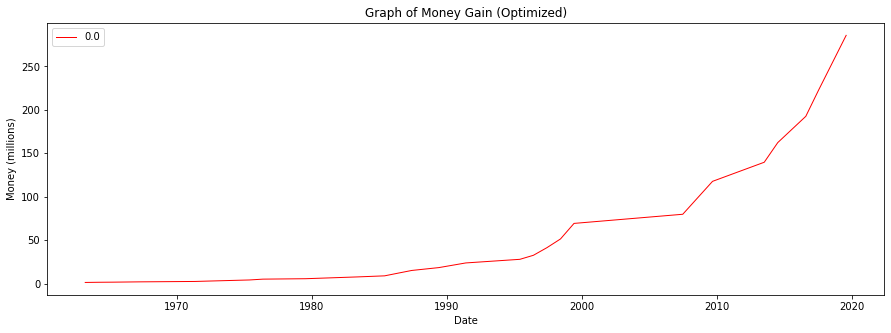

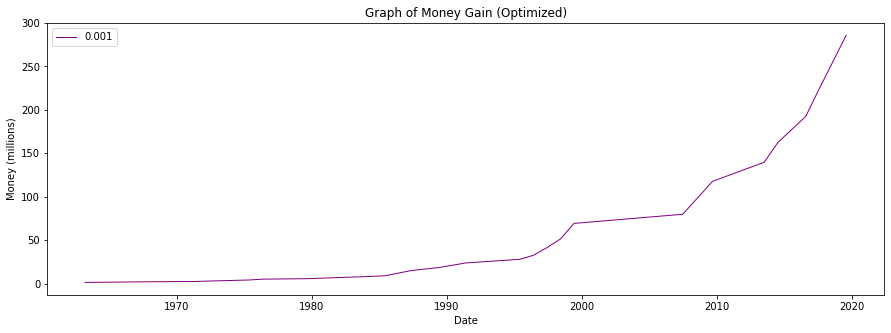

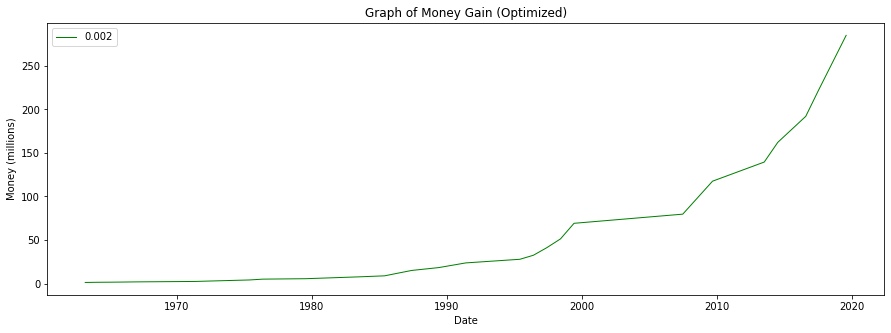

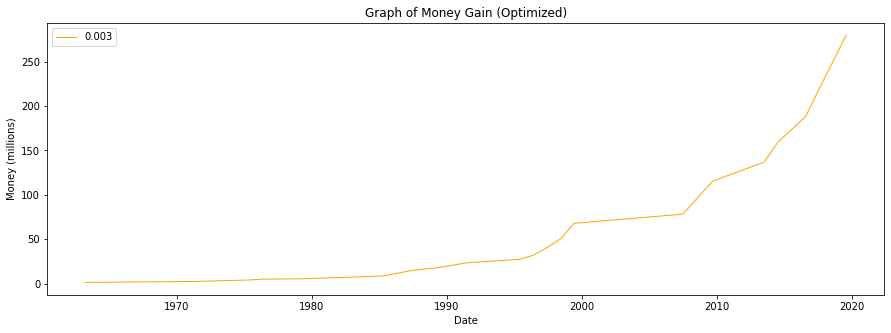

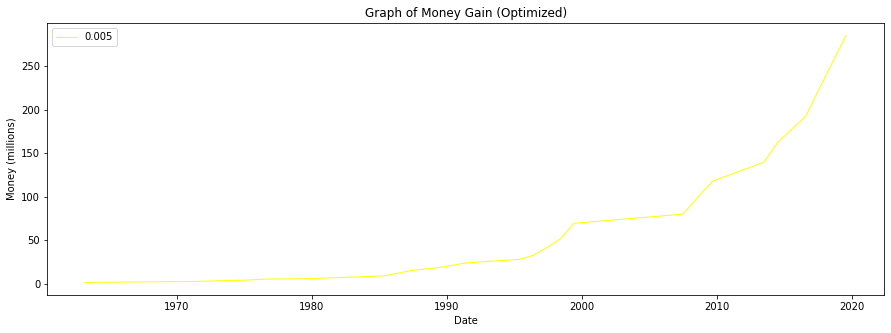

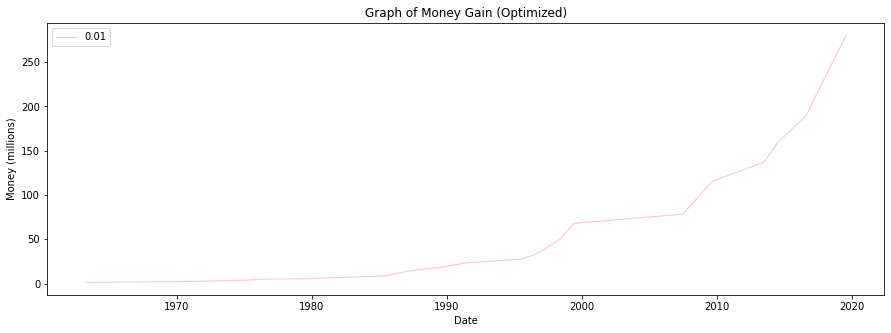

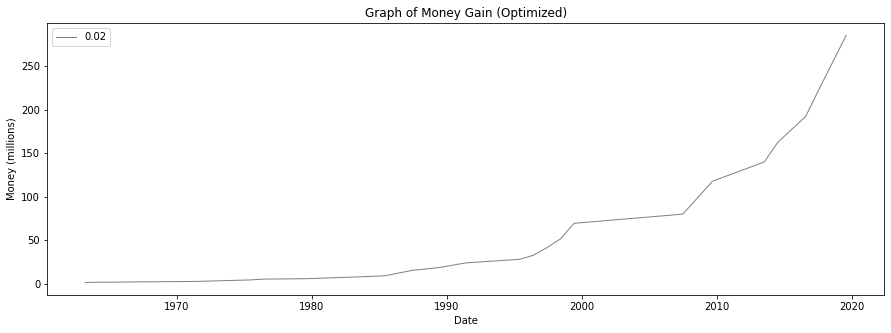

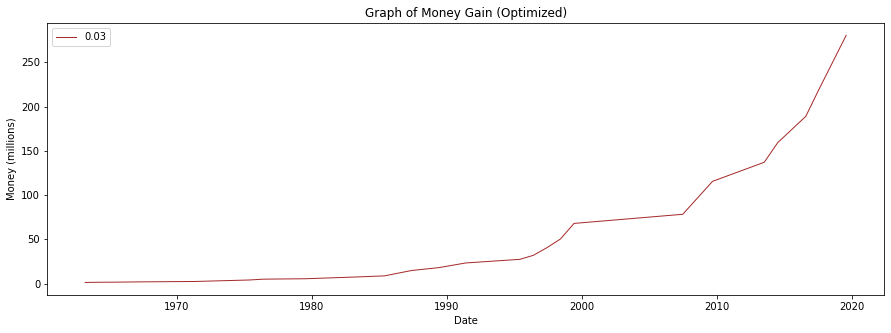

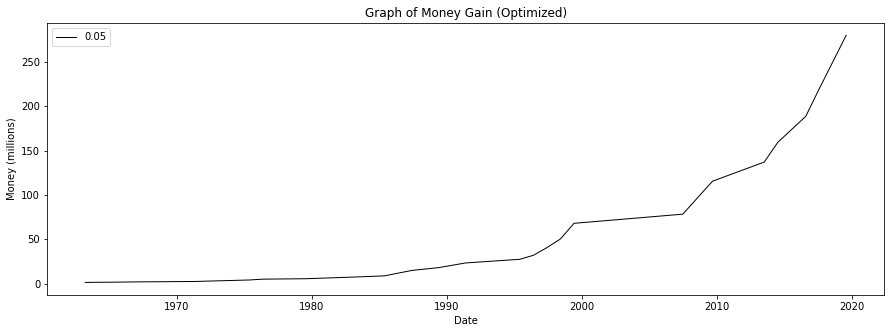

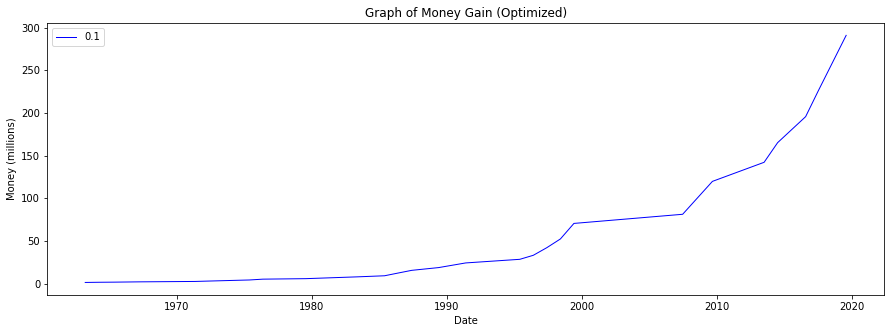

In [219]:
cmaps= ['red','purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue' ]

for i in range(len(sd)):   
    plt.figure(1, figsize=(15, 5))
    plt.plot(date_test[trade_res_all[i]], money_res_all[i] , color=cmaps[i], lw=1, label = sd[i])  
    plt.xlabel('Date')
    plt.ylabel('Money (millions)')
    plt.title('Graph of Money Gain (Optimized)')
    plt.legend(loc="upper left") 
    plt.show()

In [ ]:
money_res_all[1]

In [ ]:
money_res_all[7]

In [ ]:
money_res_all[5]